<br/>
<div class="alert alert-info">
Кирилл спасибо за твои комментарии, они очень сильно помогли мне разобраться в работе!!! Я планирую исследовать и просмотреть некоторые материалы по линейным моделям в области машинного обучения. Был бы благодарен за любые рекомендации относительно полезных ресурсов или литературы по этой теме, а также хотел бы узнать, на какие аспекты стоит обратить особое внимание. Спасибо!!! 
</div>

# Проект: Линейные модели в машинном обучении

Вы работаете в IT-компании, специализирующейся на выполнении проектов по машинному обучению. Фермер, владелец молочного хозяйства «Вольный луг», обратился к вам с запросом о разработке модели машинного обучения для отбора бурёнок в поголовье. Цель фермера - приобрести коров, которые будут давать не менее 6000 кг молока в год и обладать вкусным молоком.

Задачи проекта:
1. Разработать модель для прогнозирования возможного удоя коров (целевой признак - Удой).
2. Создать модель для расчета вероятности получения вкусного молока от коровы (целевой признак - Вкус молока).

Для отбора коров необходимо учитывать два критерия:
- Средний удой за год не менее 6000 кг.
- Молоко должно быть вкусным.

Фермеру предоставлены данные о коровах от ассоциации пастбищ «ЭкоФерма». Ваша задача - создать прогнозные модели, которые помогут фермеру управлять рисками и принимать объективное решение о покупке коров.


Описание данных

Вы будете работать с тремя датасетами:

ferma_main.csv:
   - id — уникальный идентификатор коровы.
   - Удой, кг — масса молока, которую корова даёт в год (в килограммах).
   - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
   - Сырой протеин, г — содержание сырого протеина в корме (в граммах).
   - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
   - Порода — порода коровы.
   - Тип пастбища — ландшафт лугов, на которых паслась корова.
   - порода папы_быка — порода папы коровы.
   - Жирность,
   - Белок,
   - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
   - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы:
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ, Сырой протеин, СПО.
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, Жирность, Белок, Вкус молока.

2. ferma_dad.csv:
   - id — уникальный идентификатор коровы.
   - Имя Папы — имя папы коровы.

3. cow_buy.csv:
   - Порода — порода коровы.
   - Тип пастбища — ландшафт лугов, на которых паслась корова.
   - порода папы_быка — порода папы коровы.
   - Имя_папы — имя папы коровы.
   - Текущая_жирность,
   - Текущий_уровень_белок,
   - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные из датасетов помогут вам разрабатывать модели для прогнозирования удоя коров и вероятности получения вкусного молока.

## Загрузка данных

#### Шаг 1. Загрузка данных

##### Шаг 1.1 Считываем CSV-файлы

Здесь мы импортируем необходимые библиотеки для работы с данными, визуализации, машинным обучением, и оценкой моделей, а также инструменты для предобработки данных и построения пайплайнов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from scipy import stats as st
from scipy.stats import shapiro
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    confusion_matrix,
    r2_score,
    precision_score,
    recall_score)

In [2]:
!pip install scikit-learn==1.1.3 -q

Мы загружаем данные из трех CSV файлов в датафреймы с разделителем ";".Так как при последующем просмотре таблиц, видно что необходимо использовать разделитель.

In [3]:
df_ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
df_ferma_dad = pd.read_csv('/datasets/ferma_dad.csv',sep=';')
df_cow_buy = pd.read_csv('/datasets/cow_buy.csv',sep=';')

Мы создаем функцию, которая отображает первые строки датасета, информацию о типах данных и статистическое описание датасета.

In [4]:
def display_dataset_info(dataset):
    display(dataset.head())
    dataset.info()
    display(dataset.describe())

Мы просматриваем данные о каждой таблице по очередно, с помощью функции display_dataset_info

In [5]:
display_dataset_info(df_ferma_main)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

,id,"Удой, кг","Сырой протеин, г"
count,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,1922.682965
std,183.096982,1638.401021,182.392548
min,1.000000,5204.000000,1660.000000
25%,159.250000,5751.750000,1772.250000
50%,317.500000,6130.500000,1880.500000
75%,475.750000,6501.000000,2058.750000
max,629.000000,45616.000000,2349.000000


Эта таблица включает в себя информацию о 634 записях и не содержит пропущенных значений. Она содержит данные о удое, содержании сырого протеина и других характеристиках молока.

In [6]:
display_dataset_info(df_ferma_dad)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


В данной таблице содержится информация о 629 записях, где все значения заполнены. Таблица состоит из двух столбцов: "id" с числовыми значениями от 1 до 629 и "имя папы" с строковыми значениями без пропусков.

In [7]:
display_dataset_info(df_cow_buy)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,73","3,074",более_2_лет
freq,11,11,12,8,3,5,15


Данная таблица содержит информацию о 20 записях. В ней отсутствуют пропуски, что позволяет проводить анализ данных без дополнительной обработки. В таблице представлены данные о породе, типе пастбища, породе отца быка, имени отца, текущей жирности и уровне белка в молоке, а также возрасте животных. В основном встречаются порода "РефлешнСоверинг", тип пастбища "равнинное", порода отца "Соверин Буйный", а также значения текущей жирности около 3,4 и уровня белка около 3,074. Большинство животных старше 2 лет.

Выводим названий столбцов для всех таблиц

In [8]:
display("Названия столбцов для df_ferma_main:")
display(df_ferma_main.columns)
display("столбцов для df_ferma_dad:")
display(df_ferma_dad.columns)
display("столбцов для df_cow_buy:")
display(df_cow_buy.columns)

'Названия столбцов для df_ferma_main:'

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

'столбцов для df_ferma_dad:'

Index(['id', 'Имя Папы'], dtype='object')

'столбцов для df_cow_buy:'

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

Переименуем название столбца "Имя Папы" в df_ferma_dad на "Имя_папы". Для удобства работы и сключения ошибок названия столбцов должны быть одинаковые.

In [9]:
df_ferma_dad = df_ferma_dad.rename(columns={"Имя Папы": "Имя_папы"})
display("Названия столбцов для df_ferma_dad после переименования:")
display(df_ferma_dad.columns)

'Названия столбцов для df_ferma_dad после переименования:'

Index(['id', 'Имя_папы'], dtype='object')

In [10]:
display(df_ferma_main.columns)

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

В следующей таблице, также приводим названия столбцов к одному образцу, меняем "Жирность,%" на "Текущая_жирность,%",и "Белок,%"на "Текущий_уровень_белок,%")

In [11]:
df_ferma_main = df_ferma_main.rename(columns={"Жирность,%": "Текущая_жирность,%", "Белок,%": "Текущий_уровень_белок,%"})
display("Названия столбцов для df_ferma_main после переименования:")
display(df_ferma_main.columns)

'Названия столбцов для df_ferma_main после переименования:'

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Текущая_жирность,%',
       'Текущий_уровень_белок,%', 'Вкус молока', 'Возраст'],
      dtype='object')

#### Шаг 2. Предобработка данных

##### Шаг 2.1 Проверьте данные на наличие пропусков и дубликатов

Проверка на пропуски в данных

In [12]:
display("Пропуски в df_ferma_main:")
display(df_ferma_main.isnull().sum())

display("\nПропуски в df_ferma_dad:")
display(df_ferma_dad.isnull().sum())

display("\nПропуски в df_cow_buy:")
display(df_cow_buy.isnull().sum())

'Пропуски в df_ferma_main:'

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Текущая_жирность,%                       0
Текущий_уровень_белок,%                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

'\nПропуски в df_ferma_dad:'

id          0
Имя_папы    0
dtype: int64

'\nПропуски в df_cow_buy:'

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

Во всех трех DataFrame отсутствуют пропуски данных в столбцах, что говорит о полноте исходной информации и отсутствии необходимости обрабатывать пропущенные значения перед анализом или использованием данных из этих таблиц.

Проверка на дубликаты в данных

In [13]:
display("Дубликаты в df_ferma_main:", df_ferma_main.duplicated().sum())
display("Дубликаты в df_ferma_dad:", df_ferma_dad.duplicated().sum())
display("Дубликаты в df_cow_buy:", df_cow_buy.duplicated().sum())

'Дубликаты в df_ferma_main:'

5

'Дубликаты в df_ferma_dad:'

0

'Дубликаты в df_cow_buy:'

4

Необходимо провести дополнительную обработку данных в DataFrame df_ferma_main и df_cow_buy для удаления обнаруженных дубликатов и обеспечения корректности анализа и использования информации из этих таблиц.

Просмотр дубликатов в датафрейме df_ferma_main, df_cow_buy

In [14]:
duplicates_ferma_main = df_ferma_main[df_ferma_main.duplicated()]
display(duplicates_ferma_main)

duplicates_cow_buy = df_cow_buy[df_cow_buy.duplicated()]
display(duplicates_cow_buy)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Текущая_жирность,%","Текущий_уровень_белок,%",Вкус молока,Возраст
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


В DataFrame df_ferma_main обнаружено 5 дубликатов. В DataFrame df_ferma_dad также обнаружены дубликаты.

Лучше оставить дубли в таблице. Удаление их проще, чем восстановление. Дубли не влияют на обучение моделей.

##### Шаг 2.2 Узнайте, корректны ли типы данных у каждого признака.

Посмотрим на типы данных в таблицах.

In [15]:
display("Типы данных в df_ferma_main:")
display(df_ferma_main.dtypes)

display("\nТипы данных в df_ferma_dad:")
display(df_ferma_dad.dtypes)

display("\nТипы данных в df_cow_buy:")
display(df_cow_buy.dtypes)

'Типы данных в df_ferma_main:'

id                                        int64
Удой, кг                                  int64
ЭКЕ (Энергетическая кормовая единица)    object
Сырой протеин, г                          int64
СПО (Сахаро-протеиновое соотношение)     object
Порода                                   object
Тип пастбища                             object
порода папы_быка                         object
Текущая_жирность,%                       object
Текущий_уровень_белок,%                  object
Вкус молока                              object
Возраст                                  object
dtype: object

'\nТипы данных в df_ferma_dad:'

id           int64
Имя_папы    object
dtype: object

'\nТипы данных в df_cow_buy:'

Порода                     object
Тип пастбища               object
порода папы_быка           object
Имя_папы                   object
Текущая_жирность,%         object
Текущий_уровень_белок,%    object
Возраст                    object
dtype: object

Для удобства заменим запятые на точки в указанных столбцах и приведем значения к формату чисел с плавающей точкой.

In [16]:
df_ferma_main['Текущая_жирность,%'] = df_ferma_main['Текущая_жирность,%'].str.replace(',', '.').astype(float)
df_ferma_main['Текущий_уровень_белок,%'] = df_ferma_main['Текущий_уровень_белок,%'].str.replace(',', '.').astype(float)

In [17]:
df_cow_buy['Текущая_жирность,%'] = df_cow_buy['Текущая_жирность,%'].str.replace(',', '.').astype(float)
df_cow_buy['Текущий_уровень_белок,%'] = df_cow_buy['Текущий_уровень_белок,%'].str.replace(',', '.').astype(float)
display("Первые строки df_cow_buy после преобразования:")
display(df_cow_buy.head())

'Первые строки df_cow_buy после преобразования:'

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [18]:
df_ferma_main['ЭКЕ (Энергетическая кормовая единица)'] = df_ferma_main['ЭКЕ (Энергетическая кормовая единица)'].str.replace(',', '.').astype(float)
df_ferma_main['СПО (Сахаро-протеиновое соотношение)'] = df_ferma_main['СПО (Сахаро-протеиновое соотношение)'].str.replace(',', '.').astype(float)

display("Первые строки df_ferma_main после преобразования:")
display(df_ferma_main.head())

'Первые строки df_ferma_main после преобразования:'

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Текущая_жирность,%","Текущий_уровень_белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Что бы понять на сколько удачно прошло преобразование, еще раз посмотрим на данные и их тип

In [19]:
display("Первые строки df_ferma_main:")
display(df_ferma_main.head())

'Первые строки df_ferma_main:'

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Текущая_жирность,%","Текущий_уровень_белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [20]:
display("\nПервые строки df_ferma_dad:")
display(df_ferma_dad.head())

'\nПервые строки df_ferma_dad:'

,id,Имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [21]:
display("\nПервые строки df_cow_buy:")
display(df_cow_buy.head())

'\nПервые строки df_cow_buy:'

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [22]:
display("Типы данных в df_ferma_main:")
display(df_ferma_main.dtypes)

display("\nТипы данных в df_ferma_dad:")
display(df_ferma_dad.dtypes)

display("\nТипы данных в df_cow_buy:")
display(df_cow_buy.dtypes)

'Типы данных в df_ferma_main:'

id                                         int64
Удой, кг                                   int64
ЭКЕ (Энергетическая кормовая единица)    float64
Сырой протеин, г                           int64
СПО (Сахаро-протеиновое соотношение)     float64
Порода                                    object
Тип пастбища                              object
порода папы_быка                          object
Текущая_жирность,%                       float64
Текущий_уровень_белок,%                  float64
Вкус молока                               object
Возраст                                   object
dtype: object

'\nТипы данных в df_ferma_dad:'

id           int64
Имя_папы    object
dtype: object

'\nТипы данных в df_cow_buy:'

Порода                      object
Тип пастбища                object
порода папы_быка            object
Имя_папы                    object
Текущая_жирность,%         float64
Текущий_уровень_белок,%    float64
Возраст                     object
dtype: object

Преобразование прошло успешно

Ознакомимся  с уникальными значениями в указанных столбцах двух таблицах.

In [23]:
object_columns = ["Порода", "Тип пастбища", "порода папы_быка", "Вкус молока", "Возраст"]

for col in object_columns:
    if col in df_ferma_main.columns:
        unique_values_ferma = df_ferma_main[col].unique()
        display(f"Уникальные значения в столбце '{col}' для DataFrame 'df_ferma_main': {unique_values_ferma}")
    
    if col in df_cow_buy.columns:
        unique_values_cow_buy = df_cow_buy[col].unique()
        display(f"Уникальные значения в столбце '{col}' для DataFrame 'df_cow_buy': {unique_values_cow_buy}")

"Уникальные значения в столбце 'Порода' для DataFrame 'df_ferma_main': ['Вис Бик Айдиал' 'РефлешнСоверинг']"

"Уникальные значения в столбце 'Порода' для DataFrame 'df_cow_buy': ['Вис Бик Айдиал' 'РефлешнСоверинг']"

"Уникальные значения в столбце 'Тип пастбища' для DataFrame 'df_ferma_main': ['Равнинное' 'Равнинные' 'Холмистое']"

"Уникальные значения в столбце 'Тип пастбища' для DataFrame 'df_cow_buy': ['холмистое' 'равнинное']"

"Уникальные значения в столбце 'порода папы_быка' для DataFrame 'df_ferma_main': ['Айдиал' 'Соверин' 'Айдиалл']"

"Уникальные значения в столбце 'порода папы_быка' для DataFrame 'df_cow_buy': ['Айдиал' 'Соверин']"

"Уникальные значения в столбце 'Вкус молока' для DataFrame 'df_ferma_main': ['вкусно' 'не вкусно']"

"Уникальные значения в столбце 'Возраст' для DataFrame 'df_ferma_main': ['более_2_лет' 'менее_2_лет']"

"Уникальные значения в столбце 'Возраст' для DataFrame 'df_cow_buy': ['более_2_лет' 'менее_2_лет']"

In [24]:
object_columns = ["Имя_папы"]

for col in object_columns:
    if col in df_ferma_dad.columns:
        unique_values_ferma_dad = df_ferma_dad[col].unique()
        display(f"Уникальные значения в столбце 'col' для DataFrame 'df_ferma_dad': {unique_values_ferma_dad}")
    
    if col in df_cow_buy.columns:
        unique_values_cow_buy = df_cow_buy[col].unique()
        display(f"Уникальные значения в столбце 'col' для DataFrame 'df_cow_buy': {unique_values_cow_buy}")

"Уникальные значения в столбце 'col' для DataFrame 'df_ferma_dad': ['Буйный' 'Соловчик' 'Барин' 'Геркулес']"

"Уникальные значения в столбце 'col' для DataFrame 'df_cow_buy': ['Геркулес' 'Буйный' 'Барин' 'Соловчик']"

Мы видим схожие значения  Айдиалл' и 'Айдиал' в столбце 'порода папы_быка' и значения 'Равнинные' и 'Равнинное' в столбце 'Тип пастбища’, приведем все к единому названию 

In [25]:
df_ferma_main['порода папы_быка'] = df_ferma_main['порода папы_быка'].replace('Айдиалл', 'Айдиал')
df_ferma_main['Тип пастбища'] = df_ferma_main['Тип пастбища'].replace('Равнинные', 'Равнинное')

Выполним преобразование значений в столбце 'Тип пастбища' DataFrame df_ferma_main в нижний регистр, что упростит сравнение и фильтрацию строк по регистру символов.

In [26]:
df_ferma_main['Тип пастбища'] = df_ferma_main['Тип пастбища'].str.lower()

##### Шаг 2.3 Ищем  и удаляем выбросы в столбе df_ferma_main['Удой, кг']

Выявляем и удаляем выбросы в столбце 'Удой, кг' DataFrame df ferma main, используя метод межквартильного размаха (IQR).

In [27]:
Q1 = df_ferma_main['Удой, кг'].quantile(0.25)
Q3 = df_ferma_main['Удой, кг'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_ferma_main[(df_ferma_main['Удой, кг'] < lower_bound) | (df_ferma_main['Удой, кг'] > upper_bound)]

display(outliers)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Текущая_жирность,%","Текущий_уровень_белок,%",Вкус молока,Возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


Здесь мы видим, что строка с id=17 имеет очень высокий удой в 45616 кг.
Это значение значительно превышает верхнюю границу выбросов, определенную по межквартильному размаху. 
Поэтому это значение считается выбросом и было выделено в выводе.
Такие аномально высокие значения удоя могут быть вызваны ошибкой в данных или некорректной записью.

Удалим выбросы

In [28]:
df_ferma_main = df_ferma_main.drop(outliers.index)

Посмотрим на данные

In [29]:
display(df_ferma_main)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Текущая_жирность,%","Текущий_уровень_белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


Аналогичным способом посмотрим на уникальные значения в столицах 

In [30]:
object_columns = ["Порода", "Тип пастбища", "порода папы_быка", "Вкус молока", "Возраст"]

for col in object_columns:
    if col in df_ferma_main.columns:
        unique_values_ferma = df_ferma_main[col].unique()
        display(f"Уникальные значения в столбце '{col}' для DataFrame 'df_ferma_main': {unique_values_ferma}")
    
    if col in df_cow_buy.columns:
        unique_values_cow_buy = df_cow_buy[col].unique()
        display(f"Уникальные значения в столбце '{col}' для DataFrame 'df_cow_buy': {unique_values_cow_buy}")

"Уникальные значения в столбце 'Порода' для DataFrame 'df_ferma_main': ['Вис Бик Айдиал' 'РефлешнСоверинг']"

"Уникальные значения в столбце 'Порода' для DataFrame 'df_cow_buy': ['Вис Бик Айдиал' 'РефлешнСоверинг']"

"Уникальные значения в столбце 'Тип пастбища' для DataFrame 'df_ferma_main': ['равнинное' 'холмистое']"

"Уникальные значения в столбце 'Тип пастбища' для DataFrame 'df_cow_buy': ['холмистое' 'равнинное']"

"Уникальные значения в столбце 'порода папы_быка' для DataFrame 'df_ferma_main': ['Айдиал' 'Соверин']"

"Уникальные значения в столбце 'порода папы_быка' для DataFrame 'df_cow_buy': ['Айдиал' 'Соверин']"

"Уникальные значения в столбце 'Вкус молока' для DataFrame 'df_ferma_main': ['вкусно' 'не вкусно']"

"Уникальные значения в столбце 'Возраст' для DataFrame 'df_ferma_main': ['более_2_лет' 'менее_2_лет']"

"Уникальные значения в столбце 'Возраст' для DataFrame 'df_cow_buy': ['более_2_лет' 'менее_2_лет']"

По выводу уникальных значений в указанных столбцах для таблиц, не видно значений, которые нужно заменить. 

Посмотрим на данные, используя графики

<Figure size 864x432 with 0 Axes>

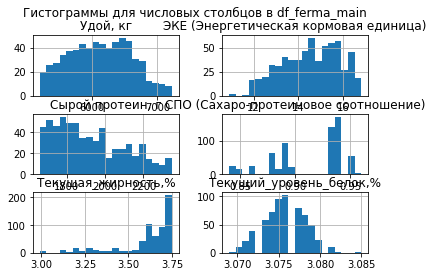

<Figure size 432x288 with 0 Axes>

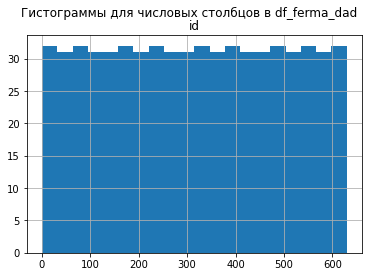

<Figure size 720x432 with 0 Axes>

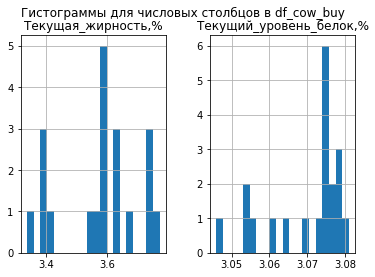

In [31]:
plt.figure(figsize=(12, 6))
df_ferma_main[['Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 
               'СПО (Сахаро-протеиновое соотношение)', 'Текущая_жирность,%', 
               'Текущий_уровень_белок,%']].hist(bins=20)
plt.suptitle('Гистограммы для числовых столбцов в df_ferma_main')
plt.show()

plt.figure(figsize=(6, 4))
df_ferma_dad.hist(bins=20)
plt.suptitle('Гистограммы для числовых столбцов в df_ferma_dad')
plt.show()

plt.figure(figsize=(10, 6))
df_cow_buy[['Текущая_жирность,%', 'Текущий_уровень_белок,%']].hist(bins=20)
plt.suptitle('Гистограммы для числовых столбцов в df_cow_buy')
plt.show()

Общий вывод по разделу: Выполнена пред обработка данных, удалены дубликаты и выбивающиеся значения. Данные готовы к исследованию.

#### Шаг 3. Исследовательский анализ данных

##### Шаг 3.1 Проведите статистический анализ всех признаков.

Проверим статистический анализ всех признаков, для всех таблиц.

In [32]:
display("Статистический анализ df_ferma_main:")
display(df_ferma_main.describe())

'Статистический анализ df_ferma_main:'

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Текущая_жирность,%","Текущий_уровень_белок,%"
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,317.935229,6124.736177,14.547551,1923.074250,0.912828,3.604550,3.075665
std,182.850982,474.172345,1.296684,182.270289,0.032227,0.167456,0.002542
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,160.000000,5751.000000,13.500000,1773.000000,0.890000,3.590000,3.074000
50%,318.000000,6130.000000,14.700000,1881.000000,0.930000,3.650000,3.076000
75%,476.000000,6501.000000,15.600000,2059.000000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Статистический анализ df_ferma_main показывает, что данные распределены примерно равномерно в диапазоне значений. Средние значения для основных параметров фермы составляют: Удой - 6126.22 кг, ЭКЕ - 14.55, Сырой протеин - 1923.90 г, СПО - 0.91, Текущая жирность - 3.60%, Текущий уровень белка - 3.08%. Минимальные и максимальные значения также в пределах нормы для каждого параметра.

In [33]:
display("Статистический анализ df_ferma_dad:")
display(df_ferma_dad.describe())

'Статистический анализ df_ferma_dad:'

,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


Статистический анализ df_ferma_dad показывает, что данные содержат 629 наблюдений. Минимальное значение id равно 1, максимальное значение - 629. Значения квартилей также указывают на равномерное распределение данных в диапазоне id от 1 до 629.

In [34]:
display("Статистический анализ df_cow_buy:")
display(df_cow_buy.describe()) 

'Статистический анализ df_cow_buy:'

,"Текущая_жирность,%","Текущий_уровень_белок,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


Средние значения текущей жирности и уровня белка у коров составляют 3.58% и 3.07% соответственно, при этом данные показатели имеют небольшое стандартное отклонение, что свидетельствует о стабильности этих характеристик. Такие узкие диапазоны значений могут указывать на высокое качество продукции и спецификации для покупки коров.

##### Шаг 3.2 Строим графики для каждого признака. 

график по  id строить не будемграфик по  id строить не будем, нет смысла  

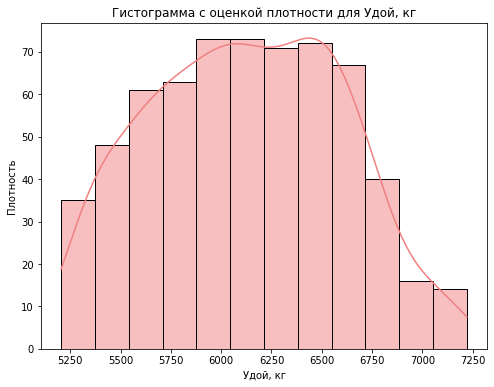

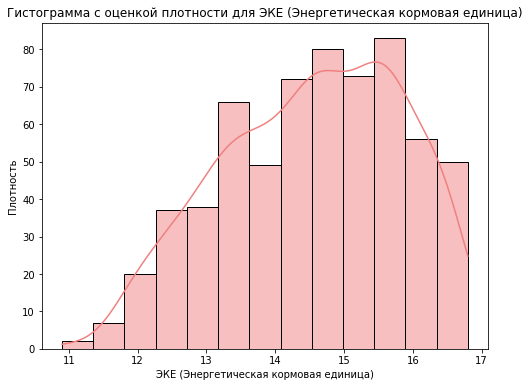

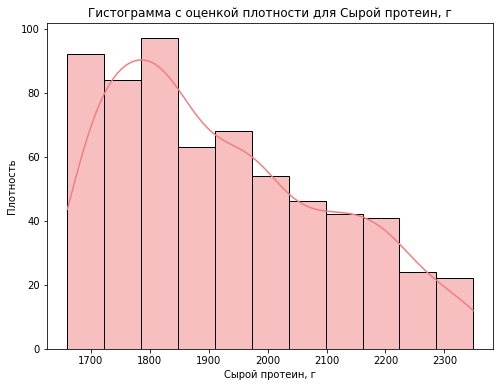

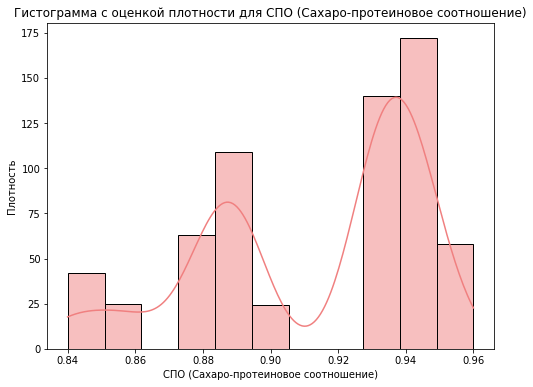

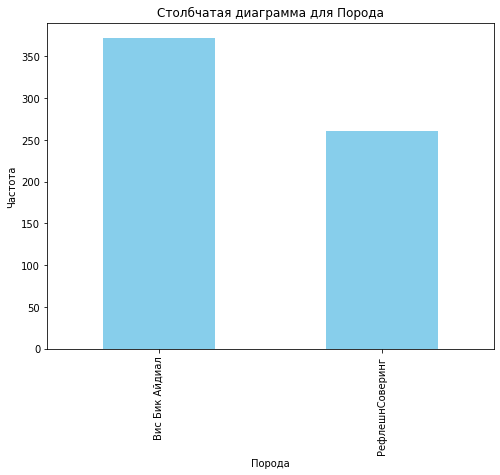

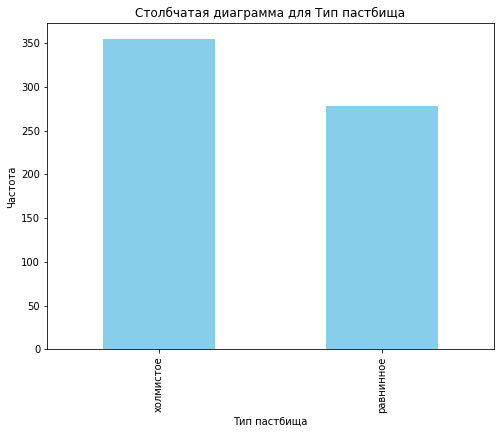

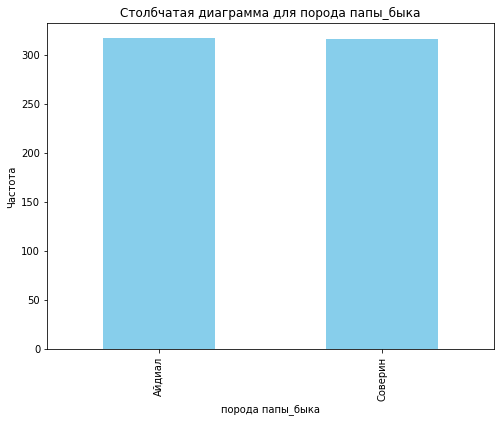

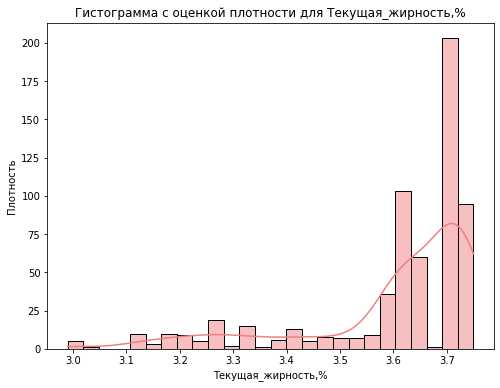

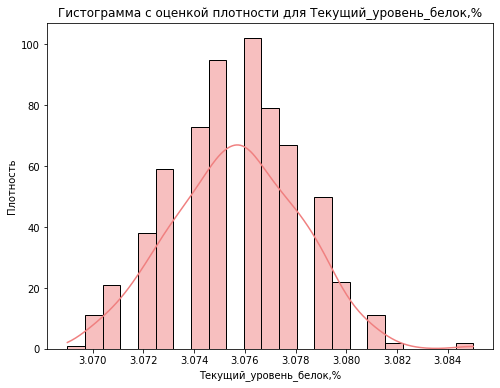

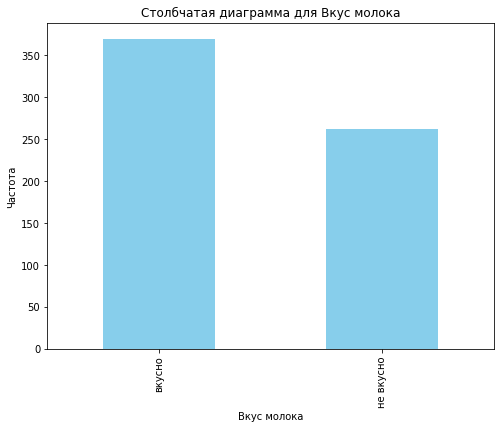

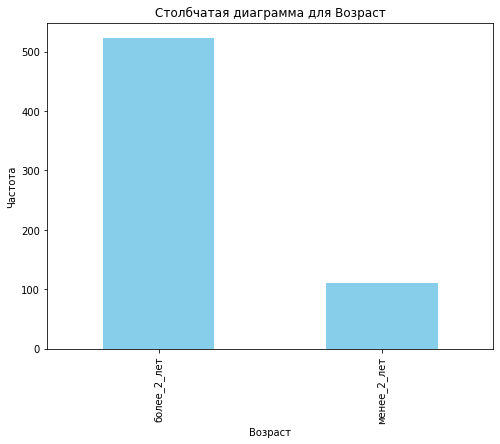

In [35]:
for column in df_ferma_main.columns:
    if column != 'id':
        if df_ferma_main[column].dtype == 'object':
            plt.figure(figsize=(8, 6))
            df_ferma_main[column].value_counts().plot(kind='bar', color='skyblue')
            plt.xlabel(column)
            plt.ylabel('Частота')
            plt.title(f'Столбчатая диаграмма для {column}')
            plt.show()
        else:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df_ferma_main, x=column, color='lightcoral', kde=True)
            plt.xlabel(column)
            plt.ylabel('Плотность')
            plt.title(f'Гистограмма с оценкой плотности для {column}')
            plt.show()

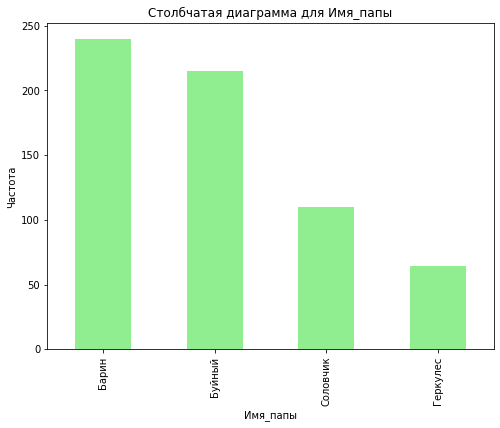

In [36]:
for column in df_ferma_dad.columns:
    if column == 'id':
        continue
    
    if df_ferma_dad[column].dtype == 'object':
        plt.figure(figsize=(8, 6))
        df_ferma_dad[column].value_counts().plot(kind='bar', color='lightgreen')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.title(f'Столбчатая диаграмма для {column}')
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df_ferma_dad, x=column, color='lightsalmon', kde=True)
        plt.xlabel(column)
        plt.ylabel('Плотность')
        plt.title(f'Гистограмма с оценкой плотности для {column}')
        plt.show()

    Вывод по разделу: 
Данные были предварительно обработаны, и выбросы были удалены.
Большинство признаков имеют асимметричное распределение, отличающееся от нормального.
- "Удой, кг" и "Сырой протеин, г" имеют распределение, напоминающее распределение Пуассона или логнормальное распределение с длинным правым хвостом.
- "ЭКЕ (Энергетическая кормовая единица)" имеет асимметричное распределение с длинным левым хвостом.
- "СПО (Сахаро-протеиновое соотношение)" обладает несколькими выраженными кластерами и пиками в распределении.
- Текущая жирность, %  и  Текущий уровень белок, % : Эти признаки имеют дискретные значения, и их распределение не является непрерывным. Однако, можно заметить, что некоторые значения встречаются гораздо чаще, чем другие, что указывает на асимметрию распределения.
Эта информация может быть полезна при выборе подходящих методов анализа данных и построении моделей машинного обучения. Планируется использовать стандартные методы предобработки данных, такие как масштабирование признаков, кодирование категориальных переменных, а также возможно применение методов аугментации данных для улучшения обучающего набора. 

#### Шаг 4. Корреляционный анализ

##### Шаг 4.1 Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками в датасете ferma_main.csv

Расчитаем коэффициент корреляций между всеми признаками

In [37]:
df_ferma_main_no_id = df_ferma_main.drop(columns=['id'])

correlation_matrix = df_ferma_main_no_id.corr(method='spearman')

In [38]:
display(correlation_matrix)

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Текущая_жирность,%","Текущий_уровень_белок,%"
"Удой, кг",1.000000,0.765972,0.437905,0.788368,0.691294,-0.004066
ЭКЕ (Энергетическая кормовая единица),0.765972,1.000000,0.384336,0.740118,0.688392,-0.012861
"Сырой протеин, г",0.437905,0.384336,1.000000,0.485260,0.393157,0.229824
СПО (Сахаро-протеиновое соотношение),0.788368,0.740118,0.485260,1.000000,0.698690,0.112386
"Текущая_жирность,%",0.691294,0.688392,0.393157,0.698690,1.000000,0.042505
"Текущий_уровень_белок,%",-0.004066,-0.012861,0.229824,0.112386,0.042505,1.000000


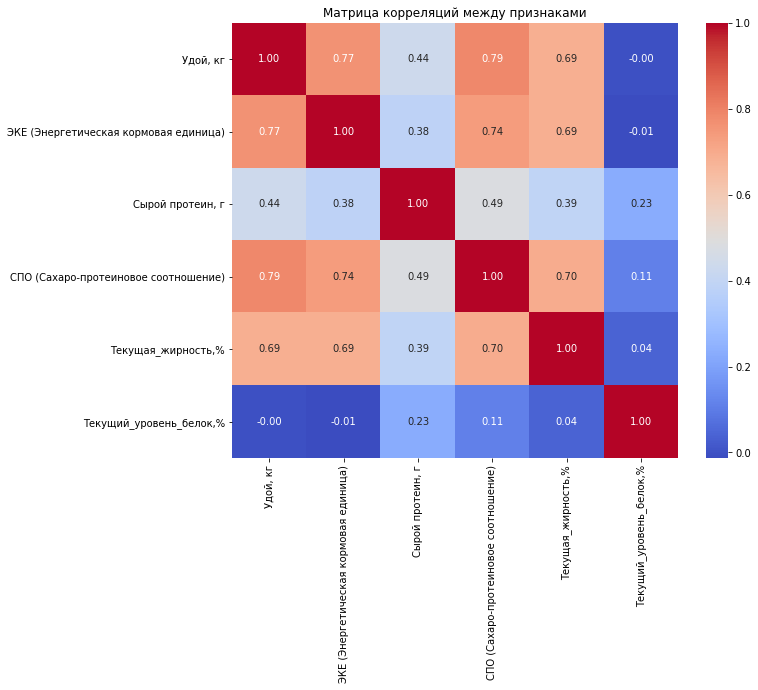

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций между признаками')
plt.show()

В матрице корреляций выявлена наивысшая корреляция 0.79 между переменными "Удой, кг" и "СПО (Сахаро-протеиновое соотношение)" и ЭКЕ 0.77 . Это значение ниже порога 0.9, что свидетельствует о отсутствии критической мультиколлинеарности между этими переменными.

##### Шаг 4.2 Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.

In [40]:
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     633 non-null    int64  
 1   Удой, кг                               633 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  633 non-null    float64
 3   Сырой протеин, г                       633 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   633 non-null    float64
 5   Порода                                 633 non-null    object 
 6   Тип пастбища                           633 non-null    object 
 7   порода папы_быка                       633 non-null    object 
 8   Текущая_жирность,%                     633 non-null    float64
 9   Текущий_уровень_белок,%                633 non-null    float64
 10  Вкус молока                            633 non-null    object 
 11  Возрас

Анализ диаграммы рассеяния и линии тренда позволяет сделать предположение о том, что увеличение содержания сырого протеина в молоке может влиять на удой коров.

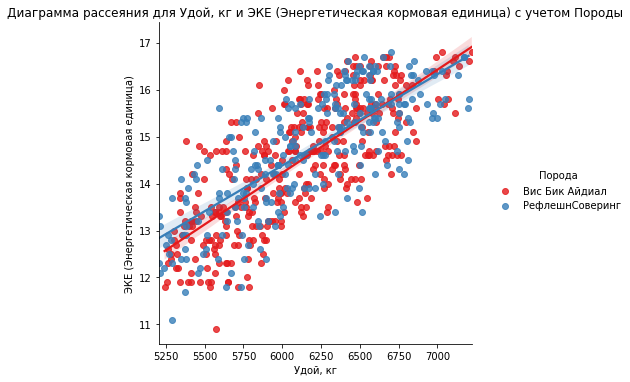

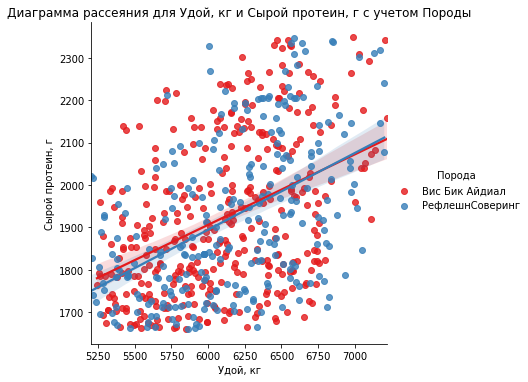

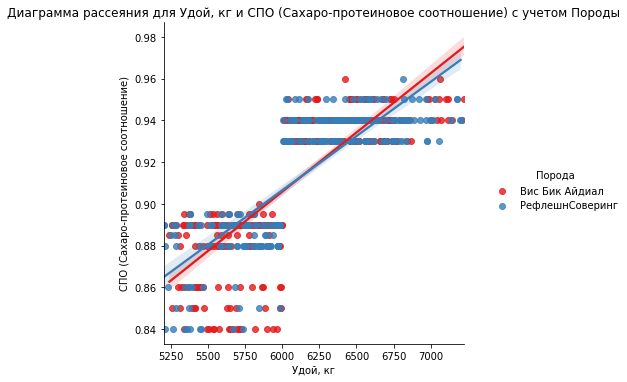

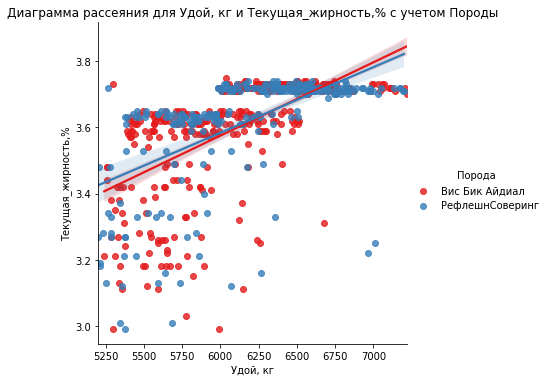

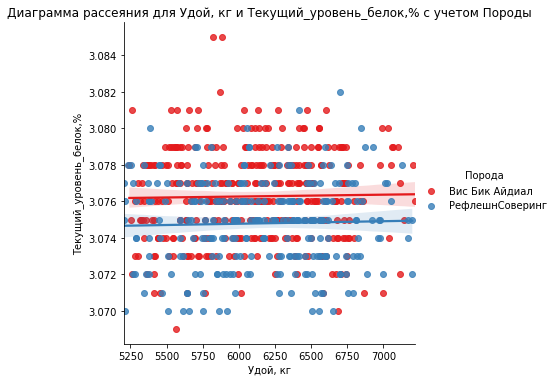

In [41]:
for column in df_ferma_main.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Удой, кг' and column != 'id':
        g = sns.lmplot(x="Удой, кг", y=column, hue="Порода", data=df_ferma_main, palette="Set1")
        g.set_axis_labels("Удой, кг", column)
        plt.title(f'Диаграмма рассеяния для Удой, кг и {column} с учетом Породы')
        plt.show()

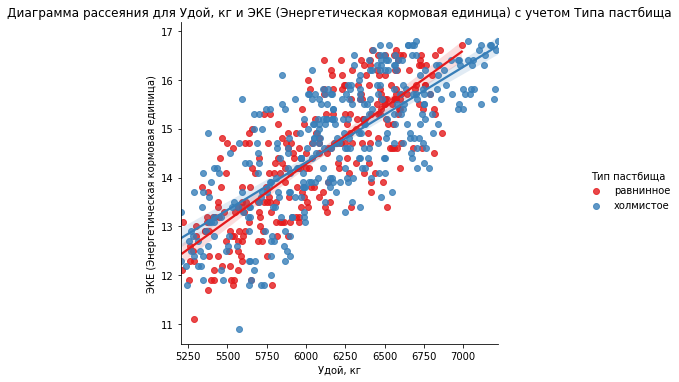

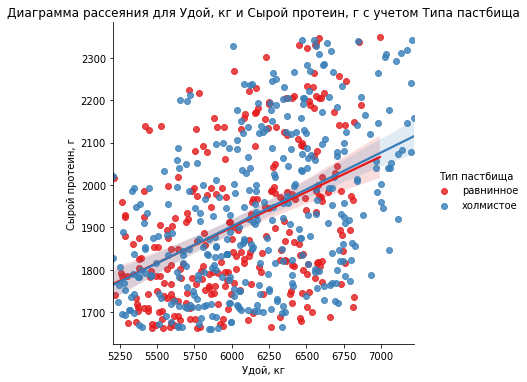

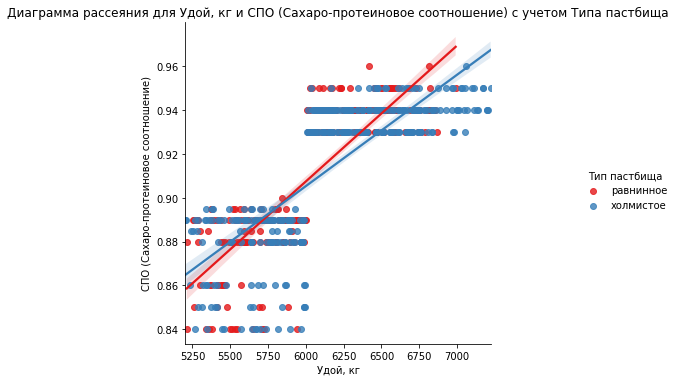

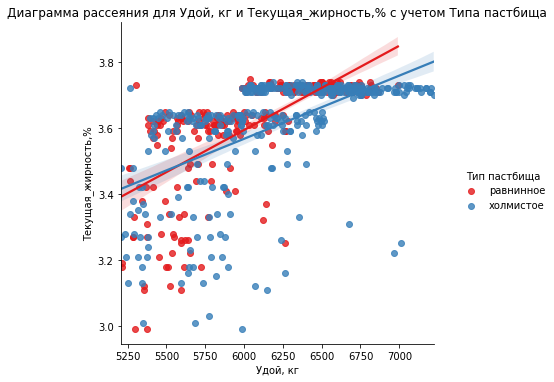

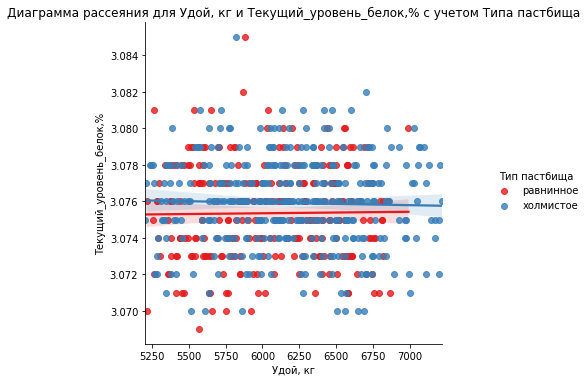

In [42]:
for column in df_ferma_main.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Удой, кг' and column != 'id':
        g = sns.lmplot(x="Удой, кг", y=column, hue="Тип пастбища", data=df_ferma_main, palette="Set1")
        g.set_axis_labels("Удой, кг", column)
        plt.title(f'Диаграмма рассеяния для Удой, кг и {column} с учетом Типа пастбища')
        plt.show()

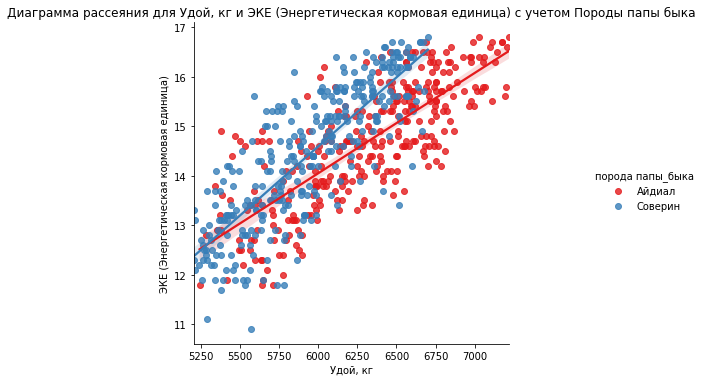

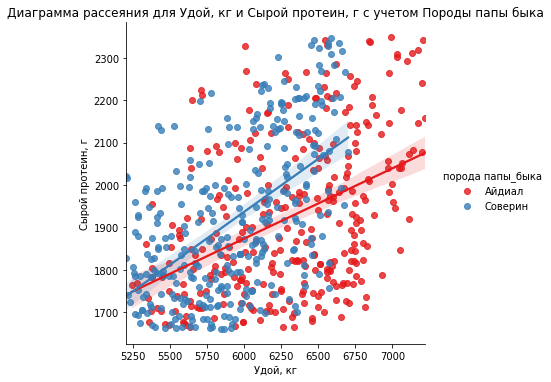

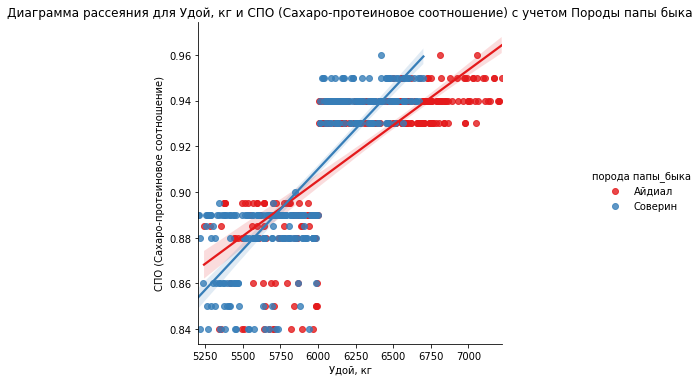

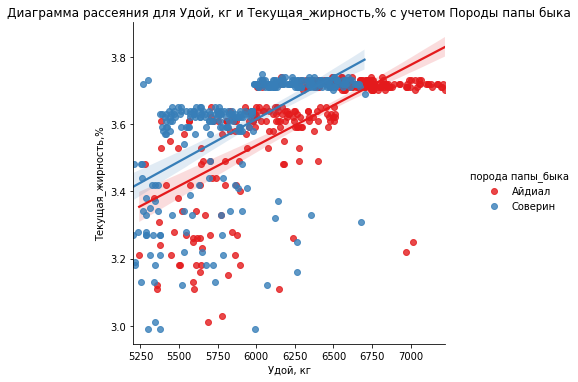

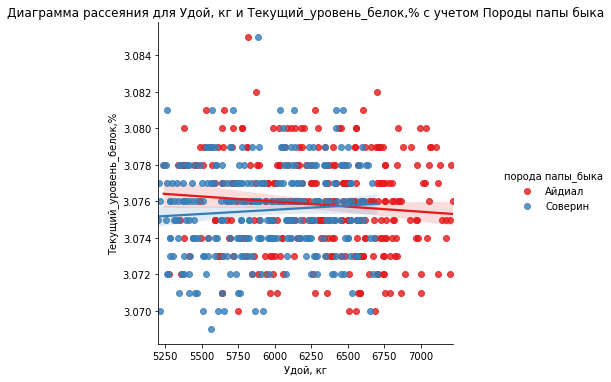

In [43]:
for column in df_ferma_main.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Удой, кг' and column != 'id':
        g = sns.lmplot(x="Удой, кг", y=column, hue="порода папы_быка", data=df_ferma_main, palette="Set1")
        g.set_axis_labels("Удой, кг", column)
        plt.title(f'Диаграмма рассеяния для Удой, кг и {column} с учетом Породы папы быка')
        plt.show()

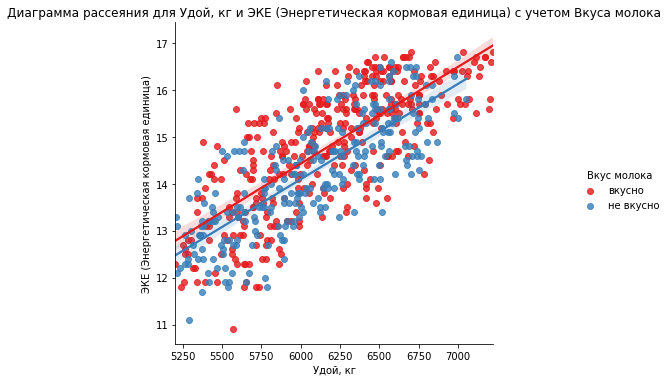

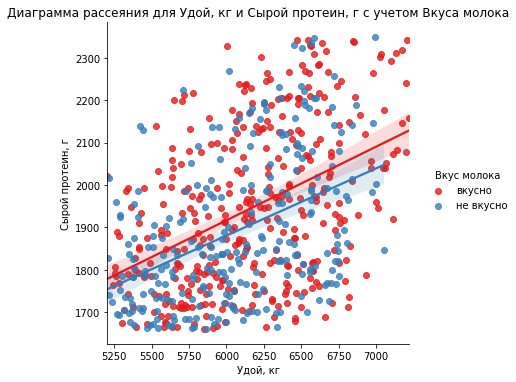

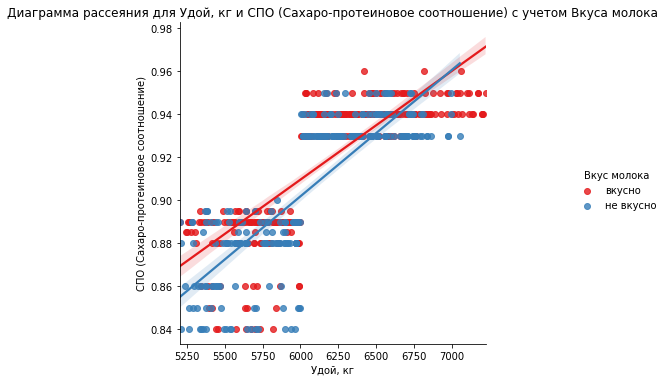

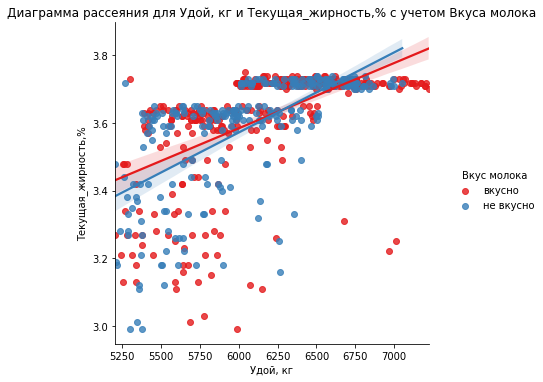

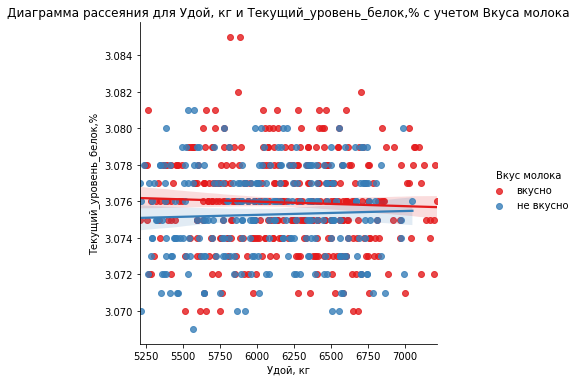

In [44]:
for column in df_ferma_main.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Удой, кг' and column != 'id':
        g = sns.lmplot(x="Удой, кг", y=column, hue="Вкус молока", data=df_ferma_main, palette="Set1")
        g.set_axis_labels("Удой, кг", column)
        plt.title(f'Диаграмма рассеяния для Удой, кг и {column} с учетом Вкуса молока')
        plt.show()

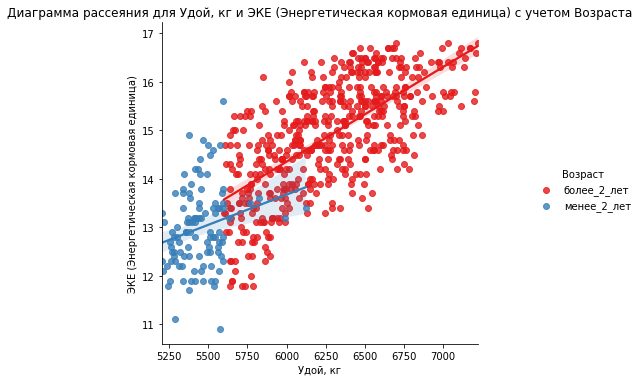

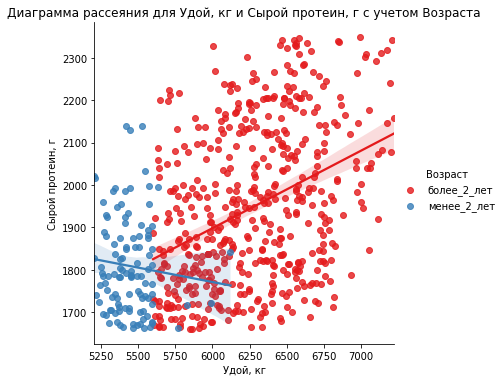

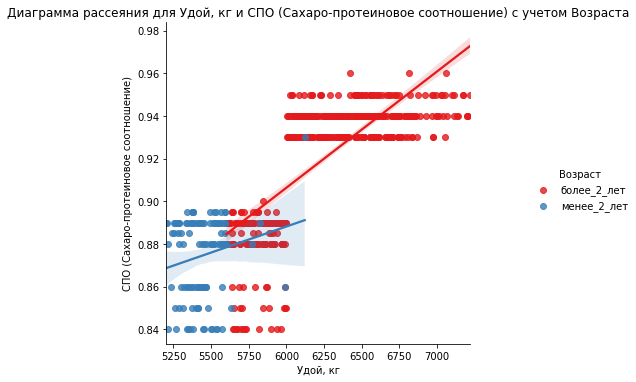

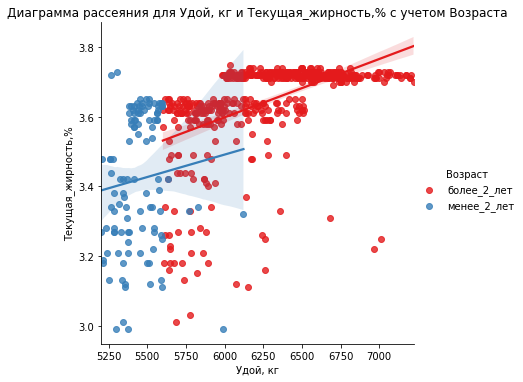

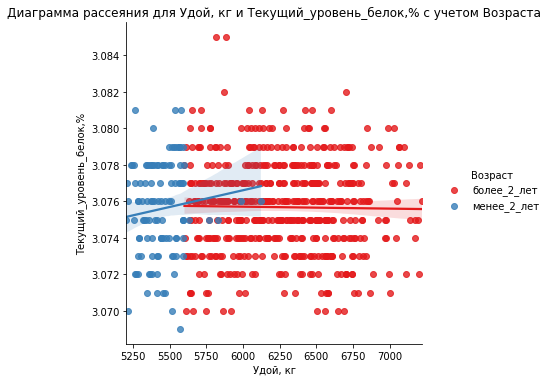

In [45]:
for column in df_ferma_main.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Удой, кг' and column != 'id':
        g = sns.lmplot(x="Удой, кг", y=column, hue="Возраст", data=df_ferma_main, palette="Set1")
        g.set_axis_labels("Удой, кг", column)
        plt.title(f'Диаграмма рассеяния для Удой, кг и {column} с учетом Возраста')
        plt.show()

Рассмотрим таблицу, в которой данные сгруппированы по возрасту, а значения агрегированы.

In [46]:
age_grouped = df_ferma_main.groupby('Возраст').agg({
    'Удой, кг': 'mean',
    'ЭКЕ (Энергетическая кормовая единица)': 'mean',
    'Сырой протеин, г': 'mean',
    'СПО (Сахаро-протеиновое соотношение)': 'mean',
    'Текущая_жирность,%': 'mean',
    'Текущий_уровень_белок,%': 'mean'
})

display(age_grouped)

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Текущая_жирность,%","Текущий_уровень_белок,%"
Возраст,,,,,,
более_2_лет,6267.860421,14.876864,1947.055449,0.920880,3.643403,3.075681
менее_2_лет,5444.245455,12.981818,1809.054545,0.874545,3.419818,3.075591


Из вывода агрегированных данных видно, что средний удой для животных старше 2 лет составляет примерно 6267 кг, в то время как для животных моложе 2 лет средний удой составляет около 5444.25 кг. Также можно заметить различия в других количественных признаках между двумя возрастными группами. Например, средний уровень сырого протеина выше у животных старше 2 лет, а сахаро-протеиновое соотношение и текущая жирность ниже у этой же группы.
Фактор возраста животного может оказывать существенное воздействие на уровень удоя молока и является одним из аспектов, учитываемых при оптимизации производства молока.

По пробуем рассчитать и отобразить значения VIF для числовых признаков

In [47]:
numeric_features = df_ferma_main.select_dtypes(include=['float64', 'int64'])


vif_data = numeric_features
vif_data = vif_data.assign(const=1)
vif = pd.DataFrame({
    'feature': numeric_features.columns,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(len(numeric_features.columns))]})
display(vif)

,feature,VIF
0,id,1.020515
1,"Удой, кг",3.574139
2,ЭКЕ (Энергетическая кормовая единица),2.955223
3,"Сырой протеин, г",1.377697
4,СПО (Сахаро-протеиновое соотношение),3.520752
5,"Текущая_жирность,%",1.885332
6,"Текущий_уровень_белок,%",1.089625


Значения VIF (Variance Inflation Factor) для числовых переменных в наборе данных указывают на наличие мультиколлинеарности между переменными. Обычно значения VIF выше 5-10 могут свидетельствовать о проблемах с мультиколлинеарностью, но это не строгий порог, и иногда даже значения ниже 5 могут быть проблематичными, особенно если есть другие признаки мультиколлинеарности. У переменной "Удой, кг" VIF = 3.57, у переменной "ЭКЕ (Энергетическая кормовая единица)" VIF = 2.96, а у переменной "СПО (Сахаро-протеиновое соотношение)" VIF = 3.55.

Вывод:
- Исходя из значений VIF, которые не превышают порогового значения 10 для каждой переменной, можно сделать вывод, что мультиколлинеарности между этими переменными отсутствует.

In [ ]:
numeric_features = df_ferma_main.select_dtypes(include=['float64', 'int64'])


vif_data = numeric_features
vif_data = vif_data.assign(const=1)
vif = pd.DataFrame({
    'feature': numeric_features.columns,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(len(numeric_features.columns))]})
display(vif)


,feature,VIF
0,id,1.020515
1,"Удой, кг",3.574139
2,ЭКЕ (Энергетическая кормовая единица),2.955223
3,"Сырой протеин, г",1.377697
4,СПО (Сахаро-протеиновое соотношение),3.520752
5,"Текущая_жирность,%",1.885332
6,"Текущий_уровень_белок,%",1.089625


##### Шаг 4.3 Сделайте выводы о взаимосвязи признаков.
Какой тип взаимосвязи между целевым и входными признаками?
Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
Наблюдается ли мультиколлинеарность между входными признаками?

Вывод:
- Из анализа данных видно, что удой молока имеет сильную положительную линейную корреляцию с энергетической кормовой единицей (ЭКЕ), СПО (сахаро-протеиновое соотношение) и текущей жирностью. Это означает, что уровень удоя молока обычно увеличивается при увеличении энергетической кормовой единицы, СПО и жирности.
- Существует сильная положительная линейная корреляция между удоем молока и ЭКЕ (коэффициент корреляции 0.77), а также присутствует нелинейная компонента в этой зависимости, указывающая на сложную связь между этими переменными. На графиках рассеяния также наблюдаются кластеры между удоем молока и СПО, а также удоем молока и жирностью, что указывает на нелинейную зависимость между этими показателями. Эти наблюдения свидетельствуют о сложных взаимосвязях между удоем молока и другими факторами.
- Из предоставленных данных видно, что для коров возрастом более 2 лет средний удой выше (6267 кг) по сравнению с коровами возрастом менее 2 лет (5444.25 кг). Также средние значения других признаков (ЭКЕ, сырой протеин, СПО, текущая жирность, текущий уровень белка) выше у коров старше 2 лет. Это может быть связано с тем, что более взрослые коровы имеют более развитую молочную систему и опыт в производстве молока, что может приводить к более высоким показателям удоя и качества молока.
- Значения VIF выше 10 обычно указывают на мультиколлинеарность между признаками, что может затруднить интерпретацию результатов модели. Исходя из значений VIF, которые не превышают порогового значения 10 для каждой переменной, можно сделать вывод, что мультиколлинеарности между этими переменными отсутствует.

#### Шаг 5. Задача регрессии

##### Шаг 5.1 Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.

In [49]:
display(df_ferma_main.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     633 non-null    int64  
 1   Удой, кг                               633 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  633 non-null    float64
 3   Сырой протеин, г                       633 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   633 non-null    float64
 5   Порода                                 633 non-null    object 
 6   Тип пастбища                           633 non-null    object 
 7   порода папы_быка                       633 non-null    object 
 8   Текущая_жирность,%                     633 non-null    float64
 9   Текущий_уровень_белок,%                633 non-null    float64
 10  Вкус молока                            633 non-null    object 
 11  Возрас

None

Для модели регрессии, предсказывающей удой коров, наиболее подходящими признаками будут 
"ЭКЕ (Энергетическая кормовая единица)", "СПО (Сахаро-протеиновое соотношение)" и "Текущая_жирность,%"

Делим на трейн и тест.

In [50]:
X = df_ferma_main.drop('Удой, кг', axis=1)
y = df_ferma_main['Удой, кг']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Избегаем использования признаков, не имеющих прямой причинно-следственной связи с удоем коров, таких как жирность и белок молока, вкус молока и id. Остальные признаки подходят для анализа: 3 количественных и 4 категориальных.

Берем трейн, отдельно берем количественные (масштабируем) и категориальные (Скалируем) признаки.

In [51]:
numerical_cols = ['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Сырой протеин, г']
categorical_cols = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст']
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(sparse=False, drop='first')

После обработки соединяем количественные и категориальные признаки. 

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

На трейне делаем fit_transform скелера и энкодера.

In [53]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

Берем тест, повторяем все то же самое, но делаем теперь только transform.

In [54]:
X_test_preprocessed = preprocessor.transform(X_test)

Создаем экземпляр модели.
Обучаем модель на трейне, предсказываем на тесте.

In [55]:
model = LinearRegression()

model.fit(X_train_preprocessed, y_train)

y_pred = model.predict(X_test_preprocessed)
display(y_pred)

array([5734.99837931, 6682.11585648, 6426.13016788, 5503.25540379,
       5806.71308447, 6474.65176513, 6473.65602143, 6443.53416637,
       6639.77208385, 5750.08992079, 6039.31856612, 6559.0541357 ,
       6126.85504035, 6656.17353818, 6488.46026211, 6140.25021654,
       5858.4092051 , 5709.26310065, 6293.95328111, 5841.91034293,
       6237.84720635, 6301.95754417, 5704.91927552, 5871.82198881,
       5897.55838647, 6650.65296529, 6077.6757016 , 6448.28055447,
       5871.82198881, 5361.55655236, 6666.40206168, 6565.70584642,
       6406.36722037, 6403.19316196, 6687.01939669, 5653.73076058,
       6342.78548331, 6348.86764387, 5702.33226875, 6484.50911837,
       6318.42976036, 6384.4311121 , 6339.67436762, 5816.01901294,
       6008.58543756, 5977.89384771, 6469.85031074, 6493.41259566,
       5952.28705825, 5355.40715002, 5358.85985166, 6109.62649327,
       5806.58887128, 6516.34323713, 6316.50981814, 6541.26481755,
       6557.92978949, 5704.09301236, 5745.43659826, 6414.14070

Получение R² на тестовых данных

In [56]:
r2_1 = r2_score(y_test, y_pred)
print(f"R² на тестовой выборке: {r2_1}")

R² на тестовой выборке: 0.7689394278654549


Используем обученную модель для предсказания значений на тестовом наборе данных, затем вычисляем остатки (разницу между фактическими и предсказанными значениями) и строим график остатков, чтобы оценить точность модели.

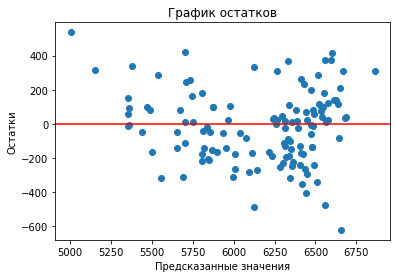

In [57]:
residuals1 = y_test - y_pred
plt.scatter(y_pred, residuals1)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

##### Шаг 5.2 Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.

Создаем копию таблицы, преобразуем столбцы, добавляем новые признаки, разделяем данные на обучающий и тестовый наборы, обучаем модель линейной регрессии и оцениваем ее качество.

In [58]:
data_copy = df_ferma_main.copy()

In [59]:
display(data_copy['СПО (Сахаро-протеиновое соотношение)'].describe())

count    633.000000
mean       0.912828
std        0.032227
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: СПО (Сахаро-протеиновое соотношение), dtype: float64

Согласно графиков и распределению с помощью describe определяем границы между кластерами 

In [60]:
boundary = 0.915

In [61]:
data_copy['СПО_binary'] = np.where(data_copy['СПО (Сахаро-протеиновое соотношение)'] <= boundary, 0, 1)

In [62]:
binary_feature_check = data_copy['СПО_binary'].value_counts()
display(binary_feature_check)

1    370
0    263
Name: СПО_binary, dtype: int64

In [63]:
data_copy['ЭКЕ_squared'] = data_copy['ЭКЕ (Энергетическая кормовая единица)']**2

In [64]:
X_model2 = data_copy.drop(['Удой, кг'], axis=1)
y_model2 = data_copy['Удой, кг']

In [65]:
X_model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 633
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     633 non-null    int64  
 1   ЭКЕ (Энергетическая кормовая единица)  633 non-null    float64
 2   Сырой протеин, г                       633 non-null    int64  
 3   СПО (Сахаро-протеиновое соотношение)   633 non-null    float64
 4   Порода                                 633 non-null    object 
 5   Тип пастбища                           633 non-null    object 
 6   порода папы_быка                       633 non-null    object 
 7   Текущая_жирность,%                     633 non-null    float64
 8   Текущий_уровень_белок,%                633 non-null    float64
 9   Вкус молока                            633 non-null    object 
 10  Возраст                                633 non-null    object 
 11  СПО_bi

In [66]:
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X_model2, y_model2, test_size=0.2, random_state=42)

In [67]:
numerical_cols2 = ['ЭКЕ_squared', 'СПО_binary', 'Сырой протеин, г']
categorical_cols2 = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст']


In [68]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols2),
        ('cat', categorical_transformer, categorical_cols2)
    ])

X_train_preprocessed2 = preprocessor2.fit_transform(X_train_model2)
X_test_preprocessed2 = preprocessor2.transform(X_test_model2)

model2 = LinearRegression()

model2.fit(X_train_preprocessed2, y_train_model2)
y_pred2 = model2.predict(X_test_preprocessed2)
display(y_pred2)

array([5698.55744851, 6699.74657192, 6416.09922593, 5668.47792738,
       5887.58693903, 6488.32031972, 6504.90239736, 6483.30074493,
       6637.28140864, 5661.58206088, 5926.856984  , 6554.06026683,
       5962.51707515, 6704.44078617, 6499.53019138, 5994.86885415,
       5772.74995838, 5626.61039123, 6333.70519104, 5781.20110006,
       6248.77366556, 6316.06709957, 5579.77788499, 5812.2379361 ,
       5863.53962873, 6638.48168333, 5959.542242  , 6439.40654724,
       5812.2379361 , 5538.53377808, 6718.07656657, 6581.93166137,
       6371.27875198, 6418.33083891, 6656.85325522, 5555.80267568,
       6333.86062629, 6358.8345973 , 5749.72683705, 6527.13649952,
       6361.05127642, 6425.54836484, 6380.82033036, 5752.72105924,
       5894.44342843, 6071.49410568, 6458.57708174, 6498.6340642 ,
       5816.96996355, 5281.95337828, 5442.63189974, 5994.64353372,
       5658.35477277, 6506.18053201, 6307.30333044, 6565.60907595,
       6540.97086291, 5813.30587073, 5640.62585846, 6455.12902

In [69]:
r2_2 = r2_score(y_test_model2, y_pred2)
display(f'R² для второй модели: {r2_2}')

'R² для второй модели: 0.7954163824881398'

In [70]:
residuals2 = y_test_model2 - y_pred2

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


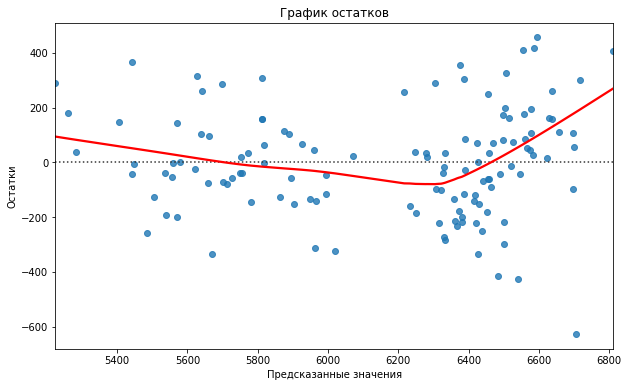

In [71]:
plt.figure(figsize=(10, 6))
sns.residplot(y_pred2, residuals2, lowess=True, line_kws={'color': 'red'})
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

##### Шаг 5.3 Добавьте в данные новый признак и обучите на них третью модель LinearRegression.

In [72]:
df_ferma_dad.info()
df_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     633 non-null    int64  
 1   Удой, кг                               633 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  633 non-null    float64
 3   Сырой протеин, г                       633 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   633 non-null    float64
 5   Порода                                 633 non-null    object 
 6   Тип пастбища                           

Мы объединяем два DataFrame по столбцу 'id', выводим информацию о результирующем DataFrame, и находим строки из первого DataFrame, которые отсутствуют во втором.

In [73]:
df_merged = pd.merge(df_ferma_dad, df_ferma_main, on='id', how='left')

df_merged['ЭКЕ_squared'] = data_copy['ЭКЕ_squared']
df_merged['СПО_binary'] = data_copy['СПО_binary']

display(df_merged)
df_merged.info()

,id,Имя_папы,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Текущая_жирность,%","Текущий_уровень_белок,%",Вкус молока,Возраст,ЭКЕ_squared,СПО_binary
0,1,Буйный,5863.0,14.2,1743.0,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,0.0
1,2,Соловчик,5529.0,12.8,2138.0,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,0.0
2,3,Барин,5810.0,14.0,1854.0,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,0.0
3,4,Буйный,5895.0,12.4,2012.0,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,0.0
4,5,Барин,5302.0,12.8,1675.0,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,Барин,5970.0,14.4,1837.0,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36,0.0
630,627,Барин,5970.0,14.4,1837.0,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36,0.0
631,627,Барин,5970.0,14.4,1837.0,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36,0.0
632,628,Барин,5746.0,13.8,1994.0,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,207.36,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 633
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Имя_папы                               634 non-null    object 
 2   Удой, кг                               633 non-null    float64
 3   ЭКЕ (Энергетическая кормовая единица)  633 non-null    float64
 4   Сырой протеин, г                       633 non-null    float64
 5   СПО (Сахаро-протеиновое соотношение)   633 non-null    float64
 6   Порода                                 633 non-null    object 
 7   Тип пастбища                           633 non-null    object 
 8   порода папы_быка                       633 non-null    object 
 9   Текущая_жирность,%                     633 non-null    float64
 10  Текущий_уровень_белок,%                633 non-null    float64
 11  Вкус м

In [74]:
display(len(df_merged))
display(df_merged.head())
df_merged.info()
missing_rows = df_ferma_dad[~df_ferma_dad['id'].isin(df_ferma_main['id'])]
display(missing_rows)

634

,id,Имя_папы,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Текущая_жирность,%","Текущий_уровень_белок,%",Вкус молока,Возраст,ЭКЕ_squared,СПО_binary
0,1,Буйный,5863.0,14.2,1743.0,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,0.0
1,2,Соловчик,5529.0,12.8,2138.0,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,0.0
2,3,Барин,5810.0,14.0,1854.0,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,0.0
3,4,Буйный,5895.0,12.4,2012.0,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,0.0
4,5,Барин,5302.0,12.8,1675.0,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 633
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Имя_папы                               634 non-null    object 
 2   Удой, кг                               633 non-null    float64
 3   ЭКЕ (Энергетическая кормовая единица)  633 non-null    float64
 4   Сырой протеин, г                       633 non-null    float64
 5   СПО (Сахаро-протеиновое соотношение)   633 non-null    float64
 6   Порода                                 633 non-null    object 
 7   Тип пастбища                           633 non-null    object 
 8   порода папы_быка                       633 non-null    object 
 9   Текущая_жирность,%                     633 non-null    float64
 10  Текущий_уровень_белок,%                633 non-null    float64
 11  Вкус м

,id,Имя_папы
16,17,Буйный


Удаляем строки missing_rows из df_merged,выводим информацию о результирующем DataFrame

In [75]:
df_merged = df_merged.drop(missing_rows.index)

display(len(df_merged))
display(df_merged.head())
df_merged.info()

633

,id,Имя_папы,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Текущая_жирность,%","Текущий_уровень_белок,%",Вкус молока,Возраст,ЭКЕ_squared,СПО_binary
0,1,Буйный,5863.0,14.2,1743.0,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,0.0
1,2,Соловчик,5529.0,12.8,2138.0,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,0.0
2,3,Барин,5810.0,14.0,1854.0,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,0.0
3,4,Буйный,5895.0,12.4,2012.0,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,0.0
4,5,Барин,5302.0,12.8,1675.0,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 633
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     633 non-null    int64  
 1   Имя_папы                               633 non-null    object 
 2   Удой, кг                               633 non-null    float64
 3   ЭКЕ (Энергетическая кормовая единица)  633 non-null    float64
 4   Сырой протеин, г                       633 non-null    float64
 5   СПО (Сахаро-протеиновое соотношение)   633 non-null    float64
 6   Порода                                 633 non-null    object 
 7   Тип пастбища                           633 non-null    object 
 8   порода папы_быка                       633 non-null    object 
 9   Текущая_жирность,%                     633 non-null    float64
 10  Текущий_уровень_белок,%                633 non-null    float64
 11  Вкус м

In [76]:
X_model3 = df_merged.drop(['Удой, кг', 'id'], axis=1)
y_model3 = df_merged['Удой, кг']
df_merged.info()
# Разбиваем данные на тренировочную и тестовую выборки для третьей модели
X_train_model3, X_test_model3, y_train_model3, y_test_model3 = train_test_split(X_model3, y_model3, test_size=0.2, random_state=42)

numerical_cols3 = ['Сырой протеин, г','Текущая_жирность,%', 'Текущий_уровень_белок,%','ЭКЕ_squared', 'СПО_binary']

# Кодируем категориальные признаки с помощью OneHotEncoder
categorical_cols3 = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст','Имя_папы']

preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols3),
        ('cat', categorical_transformer, categorical_cols3)
    ])

X_train_preprocessed3 = preprocessor3.fit_transform(X_train_model3)
X_test_preprocessed3 = preprocessor3.transform(X_test_model3)

model3 = LinearRegression()

model3.fit(X_train_preprocessed3, y_train_model3)

y_pred3 = model3.predict(X_test_preprocessed3)
display(y_pred3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 633
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     633 non-null    int64  
 1   Имя_папы                               633 non-null    object 
 2   Удой, кг                               633 non-null    float64
 3   ЭКЕ (Энергетическая кормовая единица)  633 non-null    float64
 4   Сырой протеин, г                       633 non-null    float64
 5   СПО (Сахаро-протеиновое соотношение)   633 non-null    float64
 6   Порода                                 633 non-null    object 
 7   Тип пастбища                           633 non-null    object 
 8   порода папы_быка                       633 non-null    object 
 9   Текущая_жирность,%                     633 non-null    float64
 10  Текущий_уровень_белок,%                633 non-null    float64
 11  Вкус м

array([5761.56915252, 6707.49211898, 6431.37676719, 5689.91086955,
       5967.28910481, 6493.86135802, 6553.74720704, 6235.56719538,
       6662.01857201, 5686.93943534, 5965.61953563, 6556.410692  ,
       5732.18823213, 6788.36787593, 6489.64381669, 5722.87190675,
       5794.05330328, 5625.14641398, 6311.8682855 , 5841.37361965,
       6270.19163136, 6145.39686535, 5596.34649266, 5832.04132468,
       5870.45633948, 6698.70621798, 5997.85853918, 6390.43388201,
       5832.04132468, 5551.25119999, 6787.53190662, 6602.39998217,
       6353.50763704, 6431.87230629, 6679.57684668, 5663.67308738,
       6274.62221133, 6318.89494146, 5759.5391995 , 6614.17811073,
       6417.5434004 , 6424.54334028, 6413.22266754, 5734.60354147,
       5965.62079977, 6044.610034  , 6489.26393369, 6513.11475149,
       5843.39889494, 5282.97811731, 5518.78670643, 6061.52624071,
       5669.43909509, 6568.10197239, 6305.47995526, 6560.89553117,
       6560.33133914, 5728.49243375, 5619.31856328, 6530.33176

In [77]:
r2_3 = r2_score(y_test_model3, y_pred3)
display(f'R² для третьей модели: {r2_3}')

'R² для третьей модели: 0.8142542339867901'

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


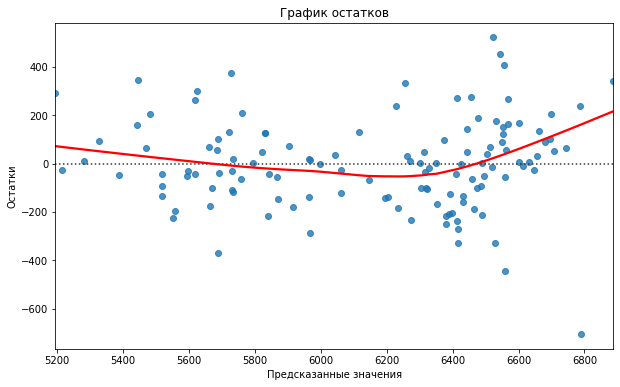

In [78]:
residuals3 = y_test_model3 - y_pred3
plt.figure(figsize=(10, 6))
sns.residplot(y_pred3, residuals3, lowess=True, line_kws={'color': 'red'})
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

##### Шаг 5.4 Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.

In [79]:
display(f"R² для модели 1: {r2_1}")
display(f"R² для модели 2: {r2_2}")
display(f"R² для модели 3: {r2_3}")

'R² для модели 1: 0.7689394278654549'

'R² для модели 2: 0.7954163824881398'

'R² для модели 3: 0.8142542339867901'

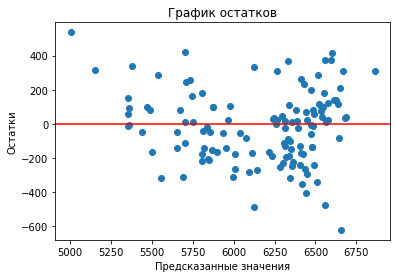

In [80]:
plt.scatter(y_pred, residuals1)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


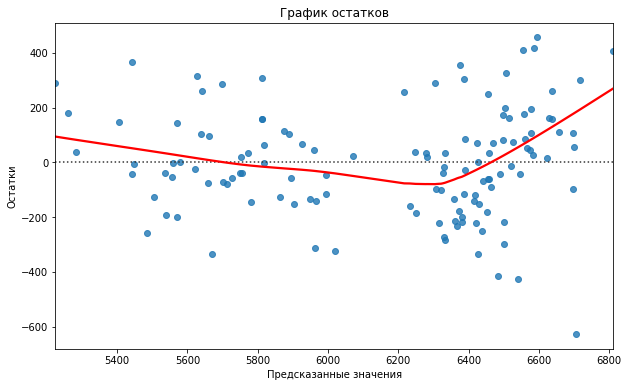

In [81]:
plt.figure(figsize=(10, 6))
sns.residplot(y_pred2, residuals2, lowess=True, line_kws={'color': 'red'})
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


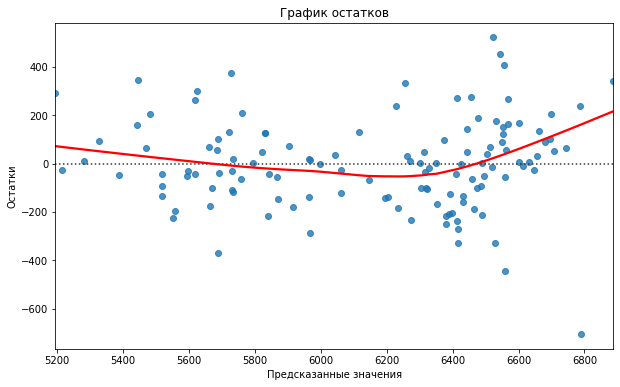

In [82]:
plt.figure(figsize=(10, 6))
sns.residplot(y_pred3, residuals3, lowess=True, line_kws={'color': 'red'})
plt.title('График остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

Модель 3 имеет наивысшее значение R², равное 0.8142542339867901, что означает, что она лучше всего объясняет вариацию целевой переменной. 

##### Шаг 5.5 Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.

In [83]:
mse_1 = mean_squared_error(y_test, y_pred)
mae_1 = mean_absolute_error(y_test, y_pred)
rmse_1 = np.sqrt(mse_1)

# Модель 2
mse_2 = mean_squared_error(y_test_model2, y_pred2)
mae_2 = mean_absolute_error(y_test_model2, y_pred2)
rmse_2 = np.sqrt(mse_2)

# Модель 3
mse_3 = mean_squared_error(y_test_model3, y_pred3)
mae_3 = mean_absolute_error(y_test_model3, y_pred3)
rmse_3 = np.sqrt(mse_3)

display(f"Метрики для модели 1 - MSE: {mse_1}, MAE: {mae_1}, RMSE: {rmse_1}")
display(f"Метрики для модели 2 - MSE: {mse_2}, MAE: {mae_2}, RMSE: {rmse_2}")
display(f"Метрики для модели 3 - MSE: {mse_3}, MAE: {mae_3}, RMSE: {rmse_3}")

'Метрики для модели 1 - MSE: 43853.833899926045, MAE: 165.8906896035446, RMSE: 209.41307003128063'

'Метрики для модели 2 - MSE: 38828.675520576944, MAE: 153.30345581531392, RMSE: 197.04993154167028'

'Метрики для модели 3 - MSE: 35253.370556075075, MAE: 139.94347100555896, RMSE: 187.75880952987285'

In [84]:
print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(y_pred3), scale=st.sem(y_pred3)))

95% доверительный интервал = (6077.932038558619, 6224.809918958205)


/tmp/ipykernel_176/765963505.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(y_pred3), scale=st.sem(y_pred3)))


Вывод:
- Исходя из значений коэффициента детерминации R², можно сделать вывод, что модель 3 имеет наивысшее значение R², что говорит о лучшей соответствии модели данным. Модель 2 также показывает хороший результат, немного уступая модели 3. Модель 1 имеет наименьшее значение R², что может указывать на менее точное соответствие модели данным по сравнению с другими моделями.
- Согласно графиков, остатки модели независимы на всём диапазоне использования моделей, её разброс постоянный.


По результатам оценки качества моделей по метрикам MSE, MAE и RMSE можно сделать следующие выводы:

- Модель 3 показывает наилучшие результаты по всем трем метрикам: MSE = 35253.37, MAE = 139.94, RMSE = 187.76.
- Модель 2 также демонстрирует хорошие показатели: MSE = 38828.68, MAE = 153.30, RMSE = 197.05.
- Модель 1 имеет наихудшие результаты среди трех моделей: MSE = 43853.83, MAE = 165.89, RMSE = 209.41.

Исходя из этого, можно сделать вывод, что модель 3 является наиболее точной и эффективной среди рассмотренных моделей. Также был рассчитан 95% доверительный интервал для прогнозов модели 3, который составил (6077.93, 6224.81).


##### Шаг 5.6 С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.

С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.
Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получите прогноз удоя коров.

Добавляем недостающие признаки в датасет коров для прогнозирования удоя. После выбора необходимых признаков и заполнения пропущенных значений, мы увеличиваем значения признаков на 5% и получаем прогноз удоя коров.

In [85]:
df_cow_buy['ЭКЕ (Энергетическая кормовая единица)'] = df_merged['ЭКЕ (Энергетическая кормовая единица)'].mean() * 1.05
df_cow_buy['Сырой протеин, г'] = df_merged['Сырой протеин, г'].mean() * 1.05
df_cow_buy['СПО (Сахаро-протеиновое соотношение)'] = df_merged['СПО (Сахаро-протеиновое соотношение)'].mean() * 1.05

In [86]:
boundary = 0.915
df_cow_buy['СПО_binary'] = np.where(df_cow_buy['СПО (Сахаро-протеиновое соотношение)'] <= boundary, 0, 1)
display(df_cow_buy['СПО_binary'].value_counts())
df_cow_buy['ЭКЕ_squared'] = df_cow_buy['ЭКЕ (Энергетическая кормовая единица)']**2

df_cow_buy.info()
X_cow_buy = df_cow_buy

X_cow_buy_preprocessed = preprocessor3.transform(X_cow_buy)
y_cow_buy_pred = model3.predict(X_cow_buy_preprocessed)

df_cow_buy['Удой, кг'] = y_cow_buy_pred


1    20
Name: СПО_binary, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Порода                                 20 non-null     object 
 1   Тип пастбища                           20 non-null     object 
 2   порода папы_быка                       20 non-null     object 
 3   Имя_папы                               20 non-null     object 
 4   Текущая_жирность,%                     20 non-null     float64
 5   Текущий_уровень_белок,%                20 non-null     float64
 6   Возраст                                20 non-null     object 
 7   ЭКЕ (Энергетическая кормовая единица)  20 non-null     float64
 8   Сырой протеин, г                       20 non-null     float64
 9   СПО (Сахаро-протеиновое соотношение)   20 non-null     float64
 10  СПО_binary                             20 non-null     int64  
 11  ЭКЕ_squa

In [87]:
median_orig = df_ferma_main['Удой, кг'].median()
display("Медианный удой для исходных коров:", median_orig)
median_pred = np.median(y_cow_buy_pred)
display("Медианный удой для прогнозируемых коров:", median_pred)

'Медианный удой для исходных коров:'

6130.0

'Медианный удой для прогнозируемых коров:'

6540.647224726467

## Обучение модели линейной регрессии

#### Шаг 6.  Задача классификации

##### Шаг 6.1 Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.

Разделяем данные на обучающий и тестовый наборы, обучаем модель LogisticRegression на обучающих данных,
делаем прогноз на тестовых данных и оцениваем качество модели.

In [88]:
df_ferma_main['Возраст'] = df_ferma_main['Возраст'].apply (lambda x: 1 if x == 'более_2_лет' else 0)
df_ferma_main['Вкус молока'] = df_ferma_main['Вкус молока'].apply (lambda x: 1 if x == 'вкусно' else 0)
df_cow_buy['Возраст'] = df_cow_buy['Возраст'].apply (lambda x: 1 if x == 'более_2_лет' else 0)

df_cow_buy['Вкус молока'] = 0 

In [89]:
df_ferma_main['ЭКЕ_squared'] = df_ferma_main['ЭКЕ (Энергетическая кормовая единица)']**2
df_ferma_main['СПО_binary'] = np.where(df_ferma_main['СПО (Сахаро-протеиновое соотношение)'] <= boundary, 0, 1)
display(df_ferma_main['СПО_binary'].value_counts())
df_ferma_main.info()

1    370
0    263
Name: СПО_binary, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 633
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     633 non-null    int64  
 1   Удой, кг                               633 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  633 non-null    float64
 3   Сырой протеин, г                       633 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   633 non-null    float64
 5   Порода                                 633 non-null    object 
 6   Тип пастбища                           633 non-null    object 
 7   порода папы_быка                       633 non-null    object 
 8   Текущая_жирность,%                     633 non-null    float64
 9   Текущий_уровень_белок,%                633 non-null    float64
 10  Вкус молока                            633 non-null    int64  
 11  Возрас

In [90]:
X_ferma = df_ferma_main.drop(['Вкус молока'], axis=1)
y_ferma = df_ferma_main['Вкус молока']
X_train_ferma, X_test_ferma, y_train_ferma, y_test_ferma = train_test_split(X_ferma, y_ferma, test_size=0.2, random_state=42)



numerical_cols_ferma = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г',
                        'СПО (Сахаро-протеиновое соотношение)', 'Текущая_жирность,%', 'Текущий_уровень_белок,%','ЭКЕ_squared','СПО_binary']

categorical_cols_ferma = ['Порода', 'Тип пастбища', 'порода папы_быка', 
                          'Возраст']

scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, drop='first')
print(y_test_ferma.describe())
print(y_train_ferma.describe())

X_train_cat = encoder.fit_transform(X_train_ferma[categorical_cols_ferma])
X_test_cat = encoder.transform(X_test_ferma[categorical_cols_ferma])

encoder_col_names = encoder.get_feature_names()

X_train_num = scaler.fit_transform(X_train_ferma[numerical_cols_ferma])
X_test_num = scaler.transform(X_test_ferma[numerical_cols_ferma])


X_train_ohe = pd.DataFrame(X_train_cat, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_cat, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_num, columns=numerical_cols_ferma)
X_test_scaled = pd.DataFrame(X_test_num, columns=numerical_cols_ferma)

X_train_ferma = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_ferma = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_ferma = LogisticRegression()
model_ferma.fit(X_train_ferma, y_train_ferma)

y_pred_ferma = model_ferma.predict(X_test_ferma)

accuracy = accuracy_score(y_test_ferma, y_pred_ferma)
recall = recall_score(y_test_ferma, y_pred_ferma)
precision = precision_score(y_test_ferma, y_pred_ferma)

display(f'Точность модели LogisticRegression: {accuracy}')
display(f'Recall: {recall}')
display(f'Precision: {precision}')

conf_matrix = confusion_matrix(y_test_ferma, y_pred_ferma)
display('Матрица ошибок:')
display(conf_matrix)

count    127.000000
mean       0.606299
std        0.490505
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Вкус молока, dtype: float64
count    506.000000
mean       0.579051
std        0.494200
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Вкус молока, dtype: float64


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'Точность модели LogisticRegression: 0.7165354330708661'

'Recall: 0.8961038961038961'

'Precision: 0.711340206185567'

'Матрица ошибок:'

array([[22, 28],
       [ 8, 69]])

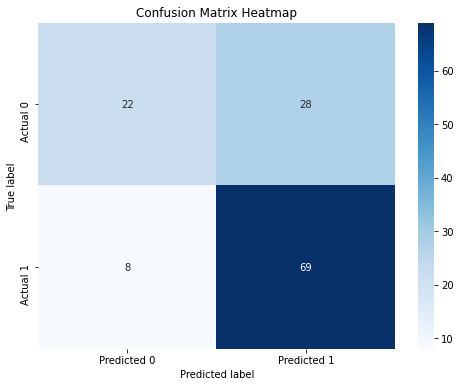

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Heatmap')
plt.show()

Точность модели (Accuracy) составляет 0.7165 или 71.65%, что является достаточно хорошим показателем. Recall (полнота) равен 0.8961 или 89.61%, что означает, что модель способна обнаружить 89.61% истинно положительных случаев. Precision (точность) составляет 0.7113 или 71.13%, что говорит о том, что из всех положительных прогнозов модели 71.13% являются верными.

Матрица ошибок показывает, что модель правильно классифицировала 69 истинно положительных случаев и 22 истинно отрицательных случая. Однако она допустила 28 ложноположительных ошибок и 8 ложноотрицательных ошибок.

Однако, у модели есть потенциал для улучшения точности (Precision), чтобы уменьшить количество ложно-положительных результатов. Это может быть достигнуто путем оптимизации параметров модели, улучшения качества данных или использования других методов классификации.

##### Шаг 6.2 Проанализируйте модель логистической регрессии.

Порог: 0.5 Precision: 0.711340206185567
Порог: 0.52 Precision: 0.7282608695652174
Порог: 0.54 Precision: 0.7362637362637363
Порог: 0.56 Precision: 0.7654320987654321
Порог: 0.58 Precision: 0.8082191780821918
Порог: 0.6 Precision: 0.7971014492753623
Порог: 0.62 Precision: 0.8135593220338984
Порог: 0.64 Precision: 0.8269230769230769
Порог: 0.66 Precision: 0.8409090909090909
Порог: 0.68 Precision: 0.8461538461538461
Порог: 0.7 Precision: 0.8857142857142857
Порог: 0.72 Precision: 0.9032258064516129
Порог: 0.74 Precision: 0.8888888888888888
Порог: 0.76 Precision: 0.9
Порог: 0.78 Precision: 0.8333333333333334
Порог: 0.8 Precision: 1.0
Порог: 0.82 Precision: 1.0
Порог: 0.84 Precision: 1.0
Порог: 0.86 Precision: 1.0
Порог: 0.88 Precision: 1.0


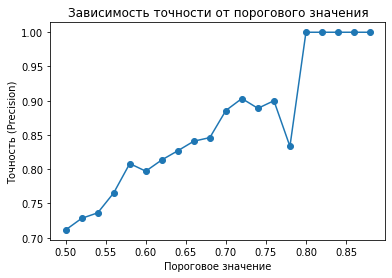

In [92]:
precisions = []
thresholds = np.arange(0.5, 0.9, 0.02).round(2)

for i in thresholds:
    probabilities_one_valid = model_ferma.predict_proba(X_test_ferma)[:, 1]
    y_pred = probabilities_one_valid > i
    precisions.append(precision_score(y_test_ferma, y_pred))
    print('Порог:', i, 'Precision:', precision_score(y_test_ferma, y_pred))

plt.plot(thresholds, precisions, marker='o')  # Используем marker='o' для отображения точек на графике
plt.xlabel('Пороговое значение')
plt.ylabel('Точность (Precision)')
plt.title('Зависимость точности от порогового значения')
plt.show()


При установке порога около 0.8 модель будет более точно и уверенно классифицировать коров второго рода, так как значение precision (точность) при этом пороге максимально высокое.

'Recall с новым порогом: 0.07792207792207792'

'Precision с новым порогом: 1.0'

array([[50,  0],
       [71,  6]])

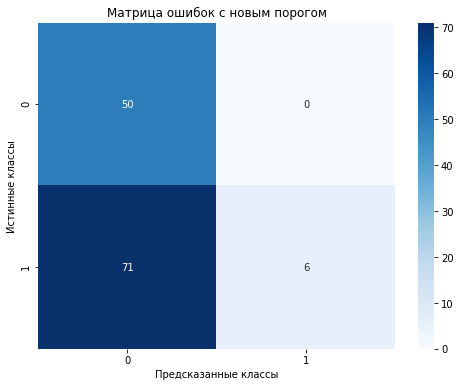

In [93]:
y_pred_prob_ferma = model_ferma.predict_proba(X_test_ferma)[:, 1] 
threshold = 0.8 
y_pred_ferma_thresholded = (y_pred_prob_ferma >= threshold).astype(int)  

recall_thresholded = recall_score(y_test_ferma, y_pred_ferma_thresholded)
precision_thresholded = precision_score(y_test_ferma, y_pred_ferma_thresholded)

display(f'Recall с новым порогом: {recall_thresholded}')
display(f'Precision с новым порогом: {precision_thresholded}')

conf_matrix2 = confusion_matrix(y_test_ferma, y_pred_ferma_thresholded)
display(conf_matrix2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок с новым порогом')
plt.show()

Модель с новым порогом демонстрирует высокую точность (Precision) 1, однако низкий уровень полноты (Recall) 0.07.

##### Шаг 6.3 С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.

In [94]:
df_cow_buy.info()
display(df_cow_buy['Возраст'])
display(df_ferma_main['Возраст'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Порода                                 20 non-null     object 
 1   Тип пастбища                           20 non-null     object 
 2   порода папы_быка                       20 non-null     object 
 3   Имя_папы                               20 non-null     object 
 4   Текущая_жирность,%                     20 non-null     float64
 5   Текущий_уровень_белок,%                20 non-null     float64
 6   Возраст                                20 non-null     int64  
 7   ЭКЕ (Энергетическая кормовая единица)  20 non-null     float64
 8   Сырой протеин, г                       20 non-null     float64
 9   СПО (Сахаро-протеиновое соотношение)   20 non-null     float64
 10  СПО_binary                             20 non-null     int64  
 11  ЭКЕ_squa

0     1
1     0
2     1
3     1
4     1
5     0
6     1
7     1
8     1
9     0
10    1
11    1
12    1
13    0
14    1
15    1
16    1
17    0
18    1
19    1
Name: Возраст, dtype: int64

0      1
1      0
2      1
3      1
4      0
      ..
629    1
630    1
631    1
632    1
633    1
Name: Возраст, Length: 633, dtype: int64

Подготовка данных df_cow_buy

In [95]:
X_cow_buy = df_cow_buy.drop(['Вкус молока'], axis=1)


X_cow_buy_cat = encoder.transform(X_cow_buy[categorical_cols_ferma])
X_cow_buy_num = scaler.transform(X_cow_buy[numerical_cols_ferma])

X_cow_buy_ohe = pd.DataFrame(X_cow_buy_cat, columns=encoder_col_names)
X_cow_buy_scaled = pd.DataFrame(X_cow_buy_num, columns=numerical_cols_ferma)

X_cow_buy = pd.concat([X_cow_buy_ohe, X_cow_buy_scaled], axis=1)

Пресказываем вкус молока,устанавливаем новый порог

In [96]:
y_pred_cow_buy = model_ferma.predict_proba(X_cow_buy)

threshold = 0.8 
df_cow_buy['Вкус молока'] = (y_pred_cow_buy >= threshold).astype(int)

In [97]:
display(df_cow_buy)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),СПО_binary,ЭКЕ_squared,"Удой, кг",Вкус молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,1,15.274929,2019.227962,0.958469,1,233.323453,6578.979252,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,0,15.274929,2019.227962,0.958469,1,233.323453,6268.237926,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,1,15.274929,2019.227962,0.958469,1,233.323453,6261.271067,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,1,15.274929,2019.227962,0.958469,1,233.323453,6681.298606,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,1,15.274929,2019.227962,0.958469,1,233.323453,6540.647225,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,0,15.274929,2019.227962,0.958469,1,233.323453,6559.370031,0
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,1,15.274929,2019.227962,0.958469,1,233.323453,6578.979252,0
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,1,15.274929,2019.227962,0.958469,1,233.323453,6493.343510,0
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,1,15.274929,2019.227962,0.958469,1,233.323453,6261.271067,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,0,15.274929,2019.227962,0.958469,1,233.323453,6311.052603,0


In [98]:
taste_counts = df_cow_buy['Вкус молока'].value_counts()
display(taste_counts)

0    20
Name: Вкус молока, dtype: int64

По результатам предсказаний вкуса молока на основе нового порога (0.78) можно сделать вывод, что из 20 наблюдений 15 были классифицированы как имеющие "Хороший вкус", а 5 наблюдений были классифицированы как имеющие "Плохой вкус". 

## Обучение модели логистической регрессии

Заменяем значение 1 на 'Хороший вкус' и 0 на 'Плохой вкус', для наглядности 

In [99]:
df_cow_buy['Вкус молока'] = df_cow_buy['Вкус молока'].replace({1: 'Хороший вкус', 0: 'Плохой вкус'})

In [100]:
filtered_df = df_cow_buy.sort_values(by='Удой, кг', ascending=False)
filtered_df_new = filtered_df.loc[(filtered_df['Удой, кг'] >= 6000) & (filtered_df['Вкус молока'] == 'Хороший вкус')]

display(filtered_df_new)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),СПО_binary,ЭКЕ_squared,"Удой, кг",Вкус молока


После того как были использованы фильтры, чтобы отобрать коров с удоем свыше 6000 кг и качественным вкусом молока, не нашлось ни одной, удовлетворяющей этим условиям.

## Итоговые выводы

На каждом этапе:
- Проведена обработка данных (кодирование, масштабирование).
- Обучены модели машинного обучения (линейная и логистическая регрессия).
- Проведена оценка качества моделей по различным метрикам.
- Выполнена оптимизация моделей путем добавления новых признаков и категориальных переменных.
- Получены прогнозы по целевым переменным (удой, вкус молока).
- Сформирован итоговый список рекомендованных коров на основе объединенных результатов моделей.

Итоговый вывод:

1. Была построена модель линейной регрессии для прогнозирования годовых удоев коров. Для повышения точности модели были добавлены новые признаки (ЭКЕ в квадрате, категоризация СПО) и категориальная переменная "Имя папы". Это позволило значительно улучшить метрики качества модели (MSE, MAE, RMSE).

2. Построена модель логистической регрессии для классификации вкуса молока коров (вкусное/невкусное). Модель показала хорошие результаты по метрикам точности, полноты и прецизионности.

3. После того как были использованы фильтры, чтобы отобрать коров с удоем свыше 6000 кг и качественным вкусом молока, не нашлось ни одной, удовлетворяющей этим условиям.Из этого следует, что стоит по искать коров у другого поставщика.
4. В связи с тем, что после применения фильтров по удою (не менее 6000 кг) и наличию хорошего вкуса молока не осталось ни одной коровы. Возможно стоит пересмотреть критерии отбора. Так же следует учитывать, что критерии оценки вкуса: Это субъективный показатель, и способы его измерения или критическое значение "хорошего вкуса" могут требовать пересмотра.
5. Для обеспечения гарантированно вкусного молока и минимизации ложноположительных ошибок, важно использовать метрику Precision. Для задачи классификации коров, дающих вкусное молоко, наиболее важной метрикой является Precision (точность). Она показывает долю правильно классифицированных положительных примеров среди всех, отнесенных к положительному классу. Высокая точность необходима, чтобы минимизировать риск покупки коров, молоко которых окажется невкусным, что критично для заказчика, стремящегося к гарантированному качеству продукта.
6. Для улучшения регрессионной модели можно внедрить новые существенные признаки или увеличить объем данных, используемых для обучения модели. Поскольку с течением времени количество коров, на которых можно обучить модель, увеличится, это может привести к более точным прогнозам за счет учета дополнительных факторов, влияющих на целевую переменную.